# CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

Le chapitre 3 traite des variables de r√©ponse √† **valeur r√©elle (probl√®mes de r√©gression)**.

Ce chapitre traitera des **variables qualitatives (cat√©gorielles) (probl√®mes de classification)**.

Les probl√®mes de classification peuvent √™tre consid√©r√©s comme des probl√®mes de r√©gression puisque la plupart des mod√®les renvoient une probabilit√© d'appartenir √† une certaine classe. √âtant donn√© que les probabilit√©s prennent des valeurs r√©elles, le probl√®me peut √©galement √™tre appel√© r√©gression - comme dans la r√©gression logistique - une technique d'apprentissage automatique utilis√©e pour la classification mais qui renvoie les probabilit√©s sous forme de valeurs r√©elles.

In [2]:
cd C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data

C:\Users\david\STATISTIQUES\Introduction to Statistical Learning\data


In [3]:
pwd

'C:\\Users\\david\\STATISTIQUES\\Introduction to Statistical Learning\\data'

In [4]:
default = pd.read_csv("default.csv")
default.head()

default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

<Figure size 864x720 with 0 Axes>

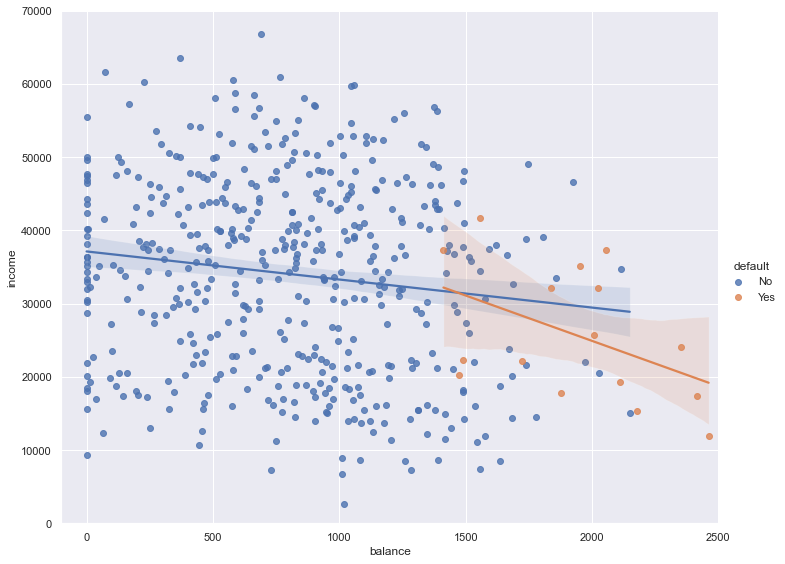

In [15]:
plt.gcf().set_size_inches(12, 10)
sns.lmplot(x= 'balance', y= 'income', data=default.sample(500), hue='default', height=8, aspect=1.28)
plt.ylim([0,70000]);
plt.xlim([-100,2500]);

On voit bien que la regression lin√©aire pour pr√©dire `default` ne marche pas

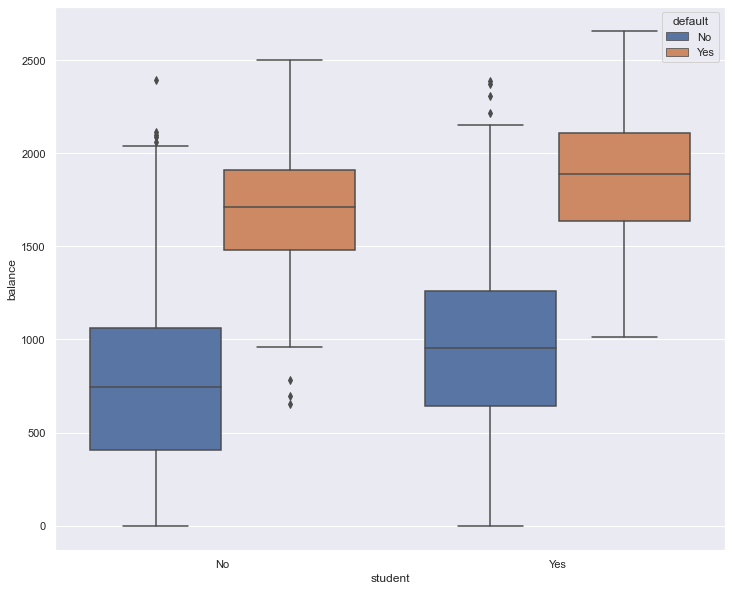

In [16]:
sns.boxplot(x = 'student', y= 'balance', data=default, hue='default');

On peut transformer des categories en valeurs num√©riques mais on ne peut pas toujours les ordonner(par exemple, `chat` = 0, `chien` = 1, `oiseau` = 2 mais un chat n'est pas inf√©rieur √† un chien (0 < 1) et un chien n'est pas inf√©rieur √† un oiseau(1 < 2))

Ce n'est que dans un probl√®me √† deux cat√©gories que l'ordre aura un sens, mais m√™me dans ce cas, la r√©gression lin√©aire produira des estimations de probabilit√© en dehors de **[0, 1]**.
                                                                                                   
Nous avons indiqu√© que la r√©gression lin√©aire n'est pas appropri√©e dans le cas d'une r√©ponse qualitative. Pourquoi pas? Supposons que nous essayons de pr√©dire l'√©tat de sant√© d'un patient aux urgences sur la base de ses sympt√¥mes. Dans cet exemple simplifi√©, il existe trois diagnostics possibles : `stroke`, `drug overdose` et `epileptic seizure`. Nous pourrions envisager de coder ces valeurs sous la forme d'une variable de **r√©ponse quantitative**, $Y$ , comme suit :


$$
Y = \left\{
    \begin{array}{ll}
        1 & \mbox{si 'stroke'} \\
        2 & \mbox{si 'drug overdose'} \\
        3 & \mbox{si ' epileptic seizure'}
    \end{array}
\right.
$$


En utilisant ce codage, les moindres carr√©s pourraient √™tre utilis√©s pour ajuster un mod√®le de r√©gression lin√©aire pour pr√©dire $Y$ sur la base d'un ensemble de pr√©dicteurs $X_1$,...,$X_p$. Malheureusement, ce codage implique **un ordre** sur les r√©sultats, pla√ßant `drug overdose` entre `stroke` et `epileptic seizure`, et insistant sur le fait que **la diff√©rence entre `stroke` et `drug overdose` est la m√™me que la diff√©rence entre `drug overdose` et `epileptic seizure`**. En pratique, il n'y a aucune raison particuli√®re pour que cela soit le cas. Par exemple, on pourrait choisir un codage tout aussi raisonnable : 


$$
Y = \left\{
    \begin{array}{ll}
        1 & \mbox{si ' epileptic seizure'} \\
        2 & \mbox{si 'stroke'} \\
        3 & \mbox{si 'drug overdose'}
    \end{array}
\right.
$$


ce qui impliquerait **une relation totalement diff√©rente entre les trois conditions**. Chacun de ces codages produirait des mod√®les lin√©aires fondamentalement diff√©rents qui conduiraient finalement √† diff√©rents ensembles de pr√©dictions sur les observations de test. Si les valeurs de la variable de r√©ponse adoptaient un ordre naturel, tel que l√©ger, mod√©r√© et s√©v√®re, et que nous estimions que l'√©cart entre l√©ger et mod√©r√© √©tait similaire √† l'√©cart entre mod√©r√© et s√©v√®re, alors un codage 1, 2, 3 serait raisonnable. Malheureusement, en g√©n√©ral, il n'existe aucun moyen naturel de convertir une variable de r√©ponse qualitative √† plus de deux niveaux en une r√©ponse quantitative pr√™te pour la r√©gression lin√©aire. Pour une r√©ponse qualitative binaire (√† deux niveaux), la situation est meilleure. Pour un exemple binaire, il n'y a peut-√™tre que deux possibilit√©s pour l'√©tat m√©dical du patient : `stroke` et `drug overdose`. Nous pourrions alors potentiellement utiliser l'approche de la variable fictive pour coder la r√©ponse comme suit :

$$
Y = \left\{
    \begin{array}{ll}
        0 & \mbox{si 'stroke'} \\
        1 & \mbox{si 'drug overdose'}
    \end{array}
\right.
$$

Nous pourrions alors **ajuster une r√©gression lin√©aire √† cette r√©ponse binaire** et pr√©dire `drug overdose`si $Y > 0.5$  et un `stroke` dans le cas contraire. Dans le cas binaire, il n'est pas difficile de montrer que m√™me si nous inversons le codage ci-dessus, la r√©gression lin√©aire produira les m√™mes pr√©dictions finales. Pour une r√©ponse binaire avec un codage **0 / 1** comme ci-dessus, la r√©gression par les moindres carr√©s n'est pas compl√®tement d√©raisonnable : on peut montrer que le $X \hat \beta$ obtenu par r√©gression lin√©aire est en fait une estimation de **Pr(drug overdose|X)** dans cas sp√©cial. Cependant, si nous utilisons la r√©gression lin√©aire, certaines de nos estimations pourraient √™tre en dehors de l'intervalle **[0, 1]** , ce qui les rend difficiles √† interpr√©ter comme des probabilit√©s ! N√©anmoins, les pr√©dictions fournissent un ordre et peuvent √™tre interpr√©t√©es comme des estimations de probabilit√© brutes. Curieusement, il s'av√®re que **les classifications que nous obtenons si nous utilisons la r√©gression lin√©aire pour pr√©dire une r√©ponse binaire seront les m√™mes que pour la proc√©dure d'analyse discriminante lin√©aire (ADL)**.

Pour r√©sumer, il y a au moins **deux raisons de ne pas effectuer de classification √† l'aide d'une m√©thode de r√©gression** : 
- (a) une m√©thode de r√©gression ne peut pas accepter une r√©ponse qualitative avec plus de deux classes
- (b) une m√©thode de r√©gression ne fournira pas d'estimations significatives de Pr(Y |X), m√™me avec seulement deux classes. 

Ainsi, il est pr√©f√©rable d'utiliser une m√©thode de classification r√©ellement adapt√©e aux valeurs de r√©ponse qualitatives. Dans la section suivante, nous pr√©sentons la r√©gression logistique, qui est bien adapt√©e au cas d'une reponse qualitative binaire                                                    

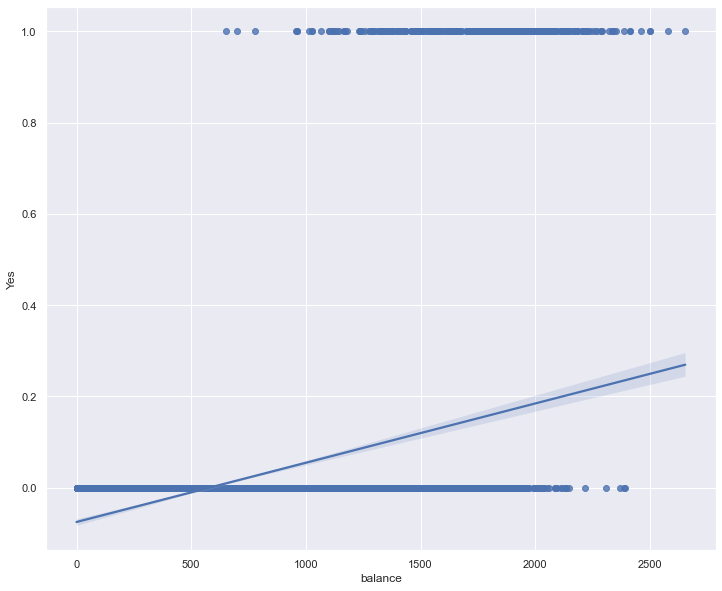

In [17]:
# default['Yes'] = (default['default'] == 'Yes').astype(int)
default['Yes'] = default['default'].apply(lambda x: x =='Yes').astype(int)
sns.regplot(x='balance', y='Yes', data=default);

## Logistic regression

**Logistic function** de **Logistic Regression** est une fonction qui g√©n√®re toujours un nombre compris entre 0 et 1. De nombreuses fonctions satisfont √† cette condition

$$y = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$$

**Logit function** est utilis√©e dans **Logistic Regression** :

$$y = \frac{1}{1 + e^{-t}}$$

avec $t$ le mod√®le lin√©aire normal : $t = \beta_0 + \beta_1X$. (les deux √©quations ci-dessus sont √©quivalentes)

$y$ peut maintenant √™tre consid√©r√© comme **la probabilit√© √©tant donn√© une certaine valeur $X$ puisqu'il sera toujours compris entre 0 et 1** : 

$$ \mbox{log} \left ( {\frac{p(X)}{1 - p(X)}}\right ) = \beta_0 + \beta_1X$$ O√π $y$ a √©t√© remplac√© par $p(X)$ , la probabilit√© de $X$ et :

$$\mbox{odds} = \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

Ainsi, par exemple, si vous jouez et pensez que Clinton remportera la pr√©sidence 80% du temps. `odds` serait de 0,8/0,2 = 4 ou dit `"4 contre 1"`. Pour chaque fois qu'elle gagne, Trump gagnera une fois.

Pour **Logistic Regression**, `log(odds)` sont mod√©lis√©es par un mod√®le lin√©aire qui peut √™tre r√©solu par **Linear Regression**. Etant donn√© une augmentation d'une unit√© de l'une des variables (disons $X_1$ ), $\beta_1$ augmentera de 1 `log-odds`. Ce qui veut dire que les chances seront multipli√©es par $e^\beta_1$.

Dans notre exemple d'√©lection, $X_1$ pourrait √™tre le pourcentage d'√©lecteurs de moins de 30 ans et $\beta_1$ pourrait √™tre 0.5. Cela voudrait dire si $X_1$ devaient **augmenter de 1%**, `log(odds)` de Clinton **augmenteraient de 0,5%**. Dans notre exemple ci-dessus, `log(odds)` de Clinton passeraient de 4 √† 4,5 et sa probabilit√© de gagner passerait de 80 % √† 4,5 / 5,5 ou 82 %

Il n'y a pas de relation lin√©aire entre la probabilit√© d'√™tre dans une certaine classe et $X$ dans la r√©gression logistique en raison de **la n√©cessit√© d'avoir des probabilit√©s entre 0 et 1**

## Estimation des coefficients avec Maximum Likelihood

En r√©gression lin√©aire, les coefficients du mod√®le ont √©t√© trouv√©s en minimisant les carr√©s des r√©sidus. Dans la r√©gression logistique, nous maximisons les probabilit√©s de tous les points par une m√©thode appel√©e **Maximum Likelihood**.

**Maximum Likelihood** (ou le maximum de vraisemblance) **multiplie la probabilit√© du mod√®le pour chaque observation et choisit les param√®tres qui maximisent ce nombre**.

**Log Likelihood** (ou la vraisemblance logarithmique) est en fait utilis√©e car la multiplication des probabilit√©s donnent un resultat se rapprochant de plus en plus pr√®s de 0, ce qui entraine un **numerical underflow problem**, qui est qu'un ordinateur ne peut plus calculer un nombre avec trop de zeros apr√®s une virgule(ce qui arrive pour la plupart des probl√®mes avec une quantit√© non triviale de donn√©es)

Pour rem√©dier √† ce probl√®me, **Log Likelihood** fait **la somme des probabilit√©s** et non leur produit, ce qui engendre un resultat diff√©rent de 0

**Likelihood function** :
    
$$L(\beta_0, \beta_1) = \prod_{y_i = 1} p(x_i) \prod_{y_i = 0}(1 - p(x_i))$$

$$\hat p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1X}}{1 + e^{\hat \beta_0 + \hat \beta_1X}}$$

In [18]:
results = smf.logit('Yes ~ balance', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.4534
Time:                        18:17:14   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

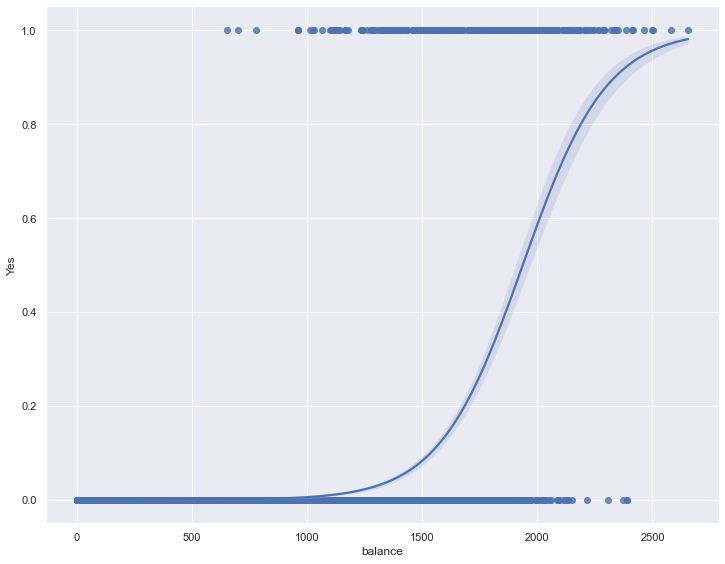

In [19]:
sns.lmplot(x='balance', y='Yes', data=default, logistic=True, height=8, aspect=1.28)

In [20]:
results.params

Intercept   -10.651331
balance       0.005499
dtype: float64

Pour chaque augmentation de **1$** de `balance`, **log(odds)** augmente de 0.005499

**log(odds)** = -10.651331 quand `balance` = 0

$$\mbox{odds} = \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1X}$$

$$\mbox{log(odds)} = \beta_0 + \beta_1X$$

si $X = 0$ alors $\mbox{odds} = e^{\beta_0}$ avec $\beta_0 = -10.651331$

In [21]:
odds = np.exp(-10.651331)
odds

2.3669316762017546e-05

si : 
    
$$\mbox{odds} = \frac{p(X)}{1 - p(X)}$$

alors :
    
$$\frac {1} {\mbox{odds}} = \frac{1 - p(X)}{p(X)}$$   

In [54]:
one_on_odds = 1 / odds

$$\frac{1 - p(X)}{p(X)} + 1 = \frac{1 - p(X)}{p(X)} + \frac{p}{p} = \frac{1 - p(X) + p(X)}{p(X)} = \frac{1}{p(X)}$$

donc :
    
$$\frac {1} {\mbox{odds}} + 1 = \frac{1}{p(X)}$$

In [55]:
one_on_p = one_on_odds + 1

si $p$ est **proche de 0**, alors $\frac{p(X)}{1 - p(X)} = p(X)$

In [56]:
1 / one_on_p

2.3668756538721668e-05

### Sklearn.linear_model.LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
X = np.column_stack((np.ones(len(default)), default['balance']))
X

array([[1.00000000e+00, 7.29526495e+02],
       [1.00000000e+00, 8.17180407e+02],
       [1.00000000e+00, 1.07354916e+03],
       ...,
       [1.00000000e+00, 8.45411989e+02],
       [1.00000000e+00, 1.56900905e+03],
       [1.00000000e+00, 2.00922183e+02]])

Attention √† la concatenation des colonnes !!!</br>
voici les diff√©rences entre **`np.vstack`, `np.hstack`, `np.column_stack`**

In [25]:
a = [0, 1, 2]
b = [3, 4, 5]

In [26]:
np.vstack((a, b))

array([[0, 1, 2],
       [3, 4, 5]])

In [27]:
np.hstack((a, b))

array([0, 1, 2, 3, 4, 5])

In [28]:
np.column_stack((a, b))

array([[0, 3],
       [1, 4],
       [2, 5]])

In [29]:
model.fit(X, default['Yes'])

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [30]:
# coefficients
model.coef_

array([[-4.99233917,  0.00509773]])

In [31]:
model.predict_proba(X)

array([[9.98103317e-01, 1.89668268e-03],
       [9.97037972e-01, 2.96202838e-03],
       [9.89142864e-01, 1.08571355e-02],
       ...,
       [9.96581052e-01, 3.41894785e-03],
       [8.79350753e-01, 1.20649247e-01],
       [9.99871626e-01, 1.28374344e-04]])

In [78]:
# predire 'default' pour balance de 1000$ 
# 99.3% de chance que 'default' = 'Yes'
#  0.7% de chance que 'default' = 'No'
model.predict_proba([[1, 1000]])

array([[0.99251209, 0.00748791]])

In [82]:
# predire 'default' pour balance de 1500$ 
#  91% de chance que 'default' = 'Yes'
#   8% de chance que 'default' = 'No'
model.predict_proba([[1, 1500]])

array([[0.91198255, 0.08801745]])

In [81]:
# predire 'default' pour balance de 2000$ 
#  44.5% de chance que 'default' = 'Yes'
#  55.5% de chance que 'default' = 'No'
model.predict_proba([[1, 2000]])

array([[0.4474996, 0.5525004]])

In [84]:
# predire 'default' pour balance de 2500$ 
#  0.5% de chance que 'default' = 'Yes'
# 94.5% de chance que 'default' = 'No'
model.predict_proba([[1, 2500]])

array([[0.05954437, 0.94045563]])

In [83]:
# predire 'default' pour balance de 3000$ 
#  0.5% de chance que 'default' = 'Yes'
# 99.5% de chance que 'default' = 'No'
model.predict_proba([[1, 3000]])

array([[0.00492494, 0.99507506]])

### Multiple Linear Regression

In [32]:
results = smf.logit('Yes ~ balance + student', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                  0.4619
Time:                        18:18:34   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Ce premier mod√®le **`balance + student`** montre une **relation n√©gative entre `student` et `default`** : ce qui signifie qu'**√™tre √©tudiant diminue la probabilit√© de `default == Yes`**

un **z-score** est le **nombre d‚Äô√©carts types par rapport √† la moyenne d‚Äôun point d‚Äôinformation**. Quoi qu‚Äôil en soit, il s‚Äôagit en fait d‚Äôune proportion du nombre d‚Äô√©carts-types en dessous ou au-dessus de la population que repr√©sente un score brut.

### Simpsons paradox

In [34]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Jun 2022   Pseudo R-squ.:                0.004097
Time:                        18:21:34   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

Le deuxi√®me mod√®le montre le contraire, √† savoir qu'**√™tre √©tudiant augmente les risques de `default = Yes`**. Cela peut s'expliquer par le fait que **les √©tudiants ont en moyenne plus de dettes**, mais compar√©s √† ceux qui ont le m√™me montant de dettes, ils sont moins susceptibles de faire `default`.

## Multiclass Logistic Regression

### One vs All

Une m√©thode simple lorsque vous avez **k classes** o√π **k > 2** consiste √† cr√©er **k-1 classificateurs de r√©gression logistique ind√©pendants** en choisissant **la variable de r√©ponse binaire**, 1 dans la classe actuelle sinon 0.

### Linear Discriminant Analysis

√Ä ne pas confondre avec l'allocation `dirichlet latente` Utilis√© pour les probl√®mes de classification multiclasses.</br>
https://fr.wikipedia.org/wiki/Allocation_de_Dirichlet_latente#:~:text=Dans%20le%20domaine%20du%20traitement,par%20des%20similarit%C3%A9s%20de%20donn%C3%A9es.</br>
https://fr.wikipedia.org/wiki/Analyse_discriminante_lin%C3%A9aire

**LDA** suppose que **toutes les variables pr√©dictives proviennent d'une distribution gaussienne et estime la moyenne et la variance pour chaque variable pr√©dictive o√π la variance est la m√™me pour chaque variable pr√©dictive**. Il estime √©galement **une probabilit√© a priori simplement en utilisant la proportion de classes dans l'ensemble d'apprentissage**.

La **r√®gle de Bayes** est utilis√©e pour **calculer une probabilit√© pour chaque classe**. Lorsqu'il y a **plus d'un pr√©dicteur**, une **gaussienne multivari√©e** est utilis√©e. Les **corr√©lations entre chaque pr√©dicteur** doivent **√™tre estim√©es** (**la matrice de covariance**) car elles sont **un param√®tre de la gaussienne multivari√©e**.

## Stock market prediciton lab

In [13]:
smarket = pd.read_csv('smarket.csv').iloc[:, 1:]
smarket.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

In [14]:
#smarket['Up'] = smarket['Direction'].apply(lambda x: 1 if x=='Up' else 0)
smarket['Up'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [15]:
smarket.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   
Up      0.074608 -0.039757 -0.024081  0.006132  0.004215  0.005423  0.022951   

           Today        Up  
Year    0.030095  0.074608  
Lag1   -0.026155 -0.039757  
Lag2   -0.010250 -0.024081  
Lag3   -0.002448  0.006132  
Lag4   -0.006900  0.004215  
Lag5   -0.034860  0.005423  
Volume  0.014592  0.022951  
Today   1.000000  0.730563  
Up      0.730563  1.000000

In [16]:
X = smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = smarket['Up'].values

In [17]:
train_bool = smarket['Year'].values < 2005
X_train = X[train_bool]
X_test = X[~train_bool]
y_train = y[train_bool]
y_test = y[~train_bool]

In [18]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Jun 2022   Pseudo R-squ.:                0.001651
Time:                        08:23:49   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [19]:
from sklearn.metrics import confusion_matrix

In [22]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                        penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                        verbose=0, warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [23]:
#          Predicted    Predicted
#            False         True
# False  [    TN     ,     FP    ]
# True   [    FN     ,     TP    ]

confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 31, 110]], dtype=int64)

In [25]:
len(y_test)

252

In [103]:
# Total classified  ==>           37 + 74 + 31 + 110 = 252

# well classified   ==>   (Predicted True / True) = 110 , (Predicted False / False) = 37

#   misclassified   ==>   (Predicted True / False) = 74, (Predicted False / True) = 31

well_classified = (37 + 110) / len(y_test)
mis_classified = (74 + 31) / len(y_test)

print('good classification:', round(well_classified,2))
print('bad classification :', round(mis_classified, 2))

good classification: 0.58
bad classification : 0.42


**`True Positive`**  (**`TP`**)  ==> (**`Predicted True`** / **`True`**)</br>
**`True Negative`**  (**`TN`**)  ==> (**`Predicted False`** / **`False`**)</br>
**`False Negative`** (**`FN`**)  ==> (**`Predicted False`** / **`True`**)</br>
**`False Positive`** (**`FP`**)  ==> (**`Predicted True`** / **`False`**)

### Accuracy

In [106]:
TP, TN, FN, FP = 110, 37, 31, 74

$$\mbox{Accuracy} = \frac{\mbox{Correct}}{\mbox{Correct + Incorrect}} = \frac{\mbox{Correct}}{\mbox{Total}} = \frac{\mbox{TP} + \mbox{TN}}{\mbox{TP} + \mbox{TN} + \mbox{FP} + \mbox{FN}}$$

In [107]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
round(accuracy, 2)

0.58

Sur le **total des 252 pr√©dictions**, seulement **147 sont bonnes** :

**`110 predictions True`**</br>
**`37 predictions False`**

ce qui fait un **score de `58%`**

### Precision

$$\mbox{Precision} = \frac{\mbox{True Positive}}{\mbox{All Predicted True}} = \frac{\mbox{TP}}{\mbox{TP + FP}}$$

La **`Precision`** est **la proportion des items pertinents parmi l'ensemble des items propos√©s**

In [108]:
precision = TP / (TP + FP)
round(precision, 2)

0.6

Sur le **total des 184 predictions `True`**, seulement **110 sont justes** :

**`110` bonnes predictions `True` `(Predicted True / True)`**</br>
**`74` mauvaises predictions `True` `(Predicted True / False)`**

### Recall ou Sensibility

$$\mbox{Recall} = \mbox{Sensibility} = \frac{\mbox{True Positive}}{\mbox{All Real True}} = \frac{\mbox{TP}}{\mbox{TP + FN}}$$

Le **`Recall`** est **taux de vrais positifs** fait r√©f√©rence √† **la probabilit√© d'un test positif, √† condition d'√™tre vraiment positif**,cad **la proportion des items pertinents propos√©s parmi l'ensemble des items pertinents**

In [109]:
recall = TP / (TP + FN)
round(recall, 2)

0.78

Sur un **total de 141 Real `True`**, seulement **`110`** ont √©t√© **pr√©dite `True`**:
    
**`110` bonnes predictions `True` `(Predicted True / True)`**</br>
**`31` mauvaises predictions `False` `(Predicted False / True)`**

### Specificity

$$\mbox{Specificity} = \frac{\mbox{True Negative}}{\mbox{All Real False}} = \frac{\mbox{TN}}{\mbox{TN + FP}}$$

La **`Specificity`** est le **taux de vrais n√©gatifs** fait r√©f√©rence √† **la probabilit√© d'un test n√©gatif, √† condition qu'il soit vraiment n√©gatif**.

In [110]:
specificity = TN / (TN + FP)
round(specificity, 2)

0.33

Sur un **total de 111 Real `False`**, seulement **`37`** ont √©t√© **pr√©dite `False`**:
    
**`37` bonnes predictions `False` `(Predicted False / False)`**</br>
**`74` mauvaises predictions `True` `(Predicted True / False)`**

### PNV : Predictive Negative Value

$$\mbox{PNV} = \frac{\mbox{True Negative}}{\mbox{All Predicted False}} = \frac{\mbox{TN}}{\mbox{TN + FN}}$$

**`PNV`** ou **`Predicted Negative Value`** (`valeur pr√©dictive n√©gative`) est **la proportion des resultats negatifs**

In [140]:
pnv = TN / (TN + FN)
round(pnv, 2)

0.54

Sur un **total de 68 predictions `False`**, seulement **`37`** sont **justes**:
    
**`37` bonnes predictions `False` qui sont  `False` `(Predicted False / False)`**</br>
**`31` mauvaises predictions `True` `(Predicted True / False)`**

In [117]:
print(f"Accuracy               : {round(accuracy*100, 2)}%")
print(f"Acc Predicted True     : {round(precision*100, 2)}%")
print(f"Acc Predicted False    : {round(pnv*100, 2)}%")
print(f"Taux Vrai Positifs     : {round(recall*100, 2)}%")
print(f"Taux Vrai Negatifs     : {round(specificity*100, 2)}%")

Accuracy               : 58.33%
Acc Predicted True     : 59.78%
Acc Predicted False    : 54.41%
Taux Vrai Positifs     : 78.01%
Taux Vrai Negatifs     : 33.33%


In [126]:
all_true_y_test = np.sum(y_test[y_test == 1])
all_false_y_test = len(y_test) - np.sum(y_test[y_test == 1])

all_true_y_pred = np.sum(y_pred[y_pred == 1])
all_false_y_pred = len(y_pred) - np.sum(y_pred[y_pred == 1])

print(f"All real values == 'True'        : {all_true_y_test}")
print(f"All real values == 'False'       : {all_false_y_test}")
print(f"All predicted values == 'True'   : {all_true_y_pred}")
print(f"All predicted values == 'False'  : {all_false_y_pred}")

confusion_matrix(y_test, lr.predict(X_test))

All real values == 'True'        : 141
All real values == 'False'       : 111
All predicted values == 'True'   : 184
All predicted values == 'False'  : 68


array([[ 37,  74],
       [ 31, 110]], dtype=int64)

In [72]:
y_pred = lr.predict(X_test)

In [143]:
# Taux de predictions 'True' par rapport aux vrai valeurs 'True' : Tous les predicted 'True' / touts les vrai 'True'
# pred_true = (FP + TP) / (FN + TP) = (74 + 110) / (31 + 110) = 184 / 141 = 1.304

pred_true = all_true_y_pred / all_true_y_test
pred_true

1.3049645390070923

Il y a **`130%` de predictions `True`** par rapport aux **vrai valeurs `True`**

In [152]:
# Recall (taux de vrais positifs) : les predictions 'True' qui sont vraiment 'True' / toutes les vrai 'True'
# TP / (TP + FN) = 110 / (110 + 31) = 110 / 141 = 0.78
print(sum(y_pred[y_test == 1]) / len(y_pred[y_test == 1]))
print(f"y_pred_true = y_true  : {int((110/141)*100)}%")
print(f"y_pred_true = y_false : {int((31/141)*100)+1}%")

0.7801418439716312
y_pred_true = y_true  : 78%
y_pred_true = y_false : 22%


Il y a **`78%` de predictions `True`** qui sont **vraiment `True`** par rapport √† **toutes les valeurs `True`**</br>
Il y a **`22%` de predictions `True`** qui sont en r√©alit√© des **valeurs`False`** cad des **Faux Negatifs**

In [153]:
# Taux de predictions 'False' par rapport aux vrai valeurs 'False' :  Tous les predicted 'False' / touts les vrai 'False'
# pred_false = (TN + FN) / (TN + FP) = (37 + 31) / (37 + 74) = 68 / 111 = 0.666

pred_false = all_false_y_pred / all_false_y_test
pred_false

0.6126126126126126

Il y a **`61%` de predictions `False`** par rapport aux **vrai valeurs `False`**

In [156]:
# Taux de vrais negatifs : les predictions 'False' qui sont vraiment 'False' / toutes les vrai 'False'
# TN / (TN + FP) = 37 / (37 + 74) = 37 / 111 = 0.33

print(f"y_pred_false = y_false  : {int((37/111)*100)}%")
print(f"y_pred_false = y_true : {int((74/111)*100)+1}%")

y_pred_false = y_false  : 33%
y_pred_false = y_true : 67%


Il y a **`33%` de predictions `False`** qui sont **vraiment `False`** par rapport √† **toutes les valeurs `False`**</br>
Il y a **`67%` de predictions `False`** qui sont en r√©alit√© des **valeurs`True`** cad des **Faux Positifs**

### Linear Discriminant Analysis and Quadratic Discriminant Analysis

In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [159]:
lda = LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                                solver='svd', store_covariance=False, tol=0.0001)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [160]:
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]], dtype=int64)

la **matrice de confusion** est **√† peu pr√®s identique** √† celle de **Logistic Regression** : il y a une valeur suppl√©mentaire bien class√©e en `True`

In [161]:
# probabilit√© des 2 classes priors (a priori) : p(y) et p(…è)
lda.priors_

array([0.49198397, 0.50801603])

### Bayes

$$ P(A\space|\space B) = \frac{P(A\space \cap \space B)}{P(B)}$$

$$ P(A\space|\space B) = \frac{P(B\space |\space A) \space P(A)}{P(B)}$$


$$ P(y\space|\space X) = \frac{P(y\space \cap \space X)}{P(X)}$$

$$ P(y\space|\space X) = \frac{P(X\space |\space y) \space P(y)}{P(X)}$$

$$ P(y\space|\space X) = P(y) \space \frac{P(X\space |\space y)}{P(X)}$$

$$ \mbox{posterior} = \mbox{prior} \space \frac{\mbox{Likelihood}}{\mbox{marginal}}$$


https://www.freecodecamp.org/news/bayes-rule-explained/</br>
https://www.analyticsvidhya.com/blog/2021/05/an-intuitive-introduction-to-bayesian-decision-theory/</br>
https://www.datascienceblog.net/post/machine-learning/linear-discriminant-analysis/

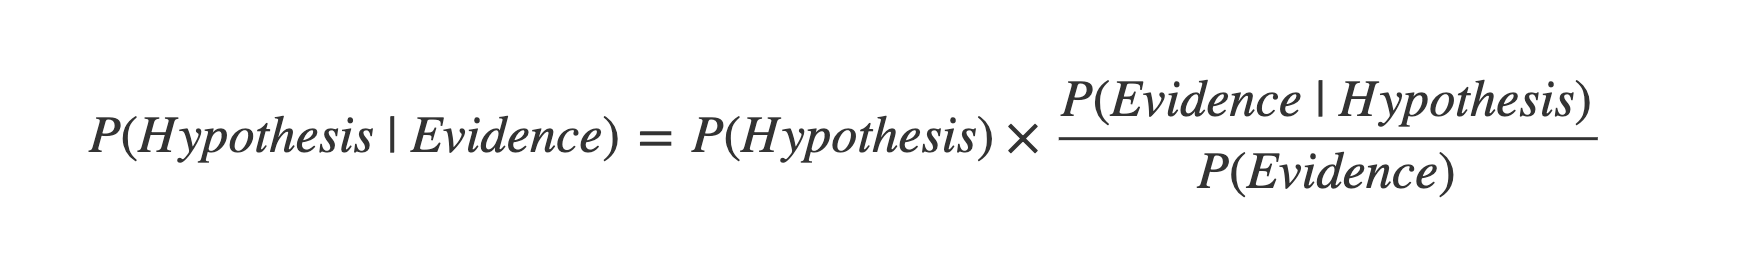

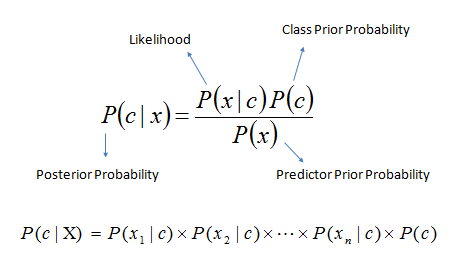

exemple :
    
$$ \mbox{P(Queen | Diamond)} = \frac{\mbox{P(Diamond | Queen)} \space \mbox{P(Queen)}}{\mbox{P(Diamond)}} $$

$$ \mbox{P(Queen | Diamond)} = \frac{\mbox{P(Diamond | Queen)} }{\mbox{P(Diamond)}} \space \mbox{P(Queen)}$$



$$\mbox{P(Diamond)} = \frac{13}{52} = \frac{1}{4}$$

$$\mbox{P(Queen)} = \frac{4}{52} = \frac{1}{13}$$

$$ \mbox{P(Diamond | Queen)} = \frac{\mbox{P(Diamond} \cap \mbox{Queen)}}{P(Queen)} = \frac{1 / 52}{1 / 13} = \frac{13}{52} = \frac{1}{4}$$

donc:

$$\mbox{P(Queen | Diamond)} = \frac{1/4 \space \mbox{x} \space 1/13}{1/4} = \frac{1}{13}$$



In [166]:
qda = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                   store_covariance=False, tol=0.0001)

# on √©tudie seulement : Lag1 + Lag2 
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis()

In [170]:
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [171]:
#      [[ 37,  74],
#       [ 31, 110]]       Pour Logistic Regression

 On voit que **Quadratic Discriminant Analysis** pr√©dit mieux les cas `positifs` (**+11**) mais moins bien les cas `negatifs`(**-7**)

### KNearestNeighbors

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
# neighbors = 3
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                        weights='uniform')

In [175]:
knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[48, 63],
       [55, 86]], dtype=int64)

**KNN** repartie mieux les **erreurs de pr√©dictions**

In [176]:
# neighbors = 5
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                        weights='uniform')

knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[40, 71],
       [59, 82]], dtype=int64)

In [177]:
# neighbors = 10
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=1, n_neighbors=10, p=2,
                        weights='uniform')

knn.fit(X_train[:,:2], y_train)
confusion_matrix(y_test, knn.predict(X_test[:,:2]))

array([[67, 44],
       [77, 64]], dtype=int64)

## Exercices

### Exercice 1

En utilisant un peu d'alg√®bre, montrez que (4.2) est √©quivalent √† (4.3). En d'autres termes, la repr√©sentation de la fonction logistique et la repr√©sentation logit pour le mod√®le de r√©gression logistique sont √©quivalentes

$$4.2$$

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$4.3$$

$$\frac {p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$

#### solution

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) = 1 - \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) =  \frac{1 - e^{\beta_0 + \beta_1 X} + e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

$$ 1 - p(X) =  \frac{1}{1 + e^{\beta_0 + \beta_1 X}}$$

on inverse l'equation :

$$ \frac{1}{1 - p(X)} =  1 + e^{\beta_0 + \beta_1 X}$$

on multiplie de chaque cot√© par $p(X)$

$$ p(X) \left ( \frac{1}{1 - p(X)}\right ) =  p(X) \left ( 1 + e^{\beta_0 + \beta_1 X} \right )$$

or :

$$ p(X) = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}}$$

ce qui donne:

$$  \frac{p(X)}{1 - p(X)} = \frac{e^{\beta_0 + \beta_1 X}}{1 + e^{\beta_0 + \beta_1 X}} \left ( 1 + e^{\beta_0 + \beta_1 X} \right )$$

$$  \frac{p(X)}{1 - p(X)} = \frac{e^{\beta_0 + \beta_1 X}(1 + e^{\beta_0 + \beta_1 X})}{1 + e^{\beta_0 + \beta_1 X}} $$

$$  \frac{p(X)}{1 - p(X)} = e^{\beta_0 + \beta_1 X}$$

on prend le log:

$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \mbox{log} \left (e^{\beta_0 + \beta_1 X}\right )$$

or, $ \mbox{log} (e^x) = x$ donc:

$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \beta_0 + \beta_1 X$$

### Exercice 2

Il a √©t√© indiqu√© dans le texte que classer une observation dans la classe pour laquelle (4.17) est la plus grande √©quivaut √† classer une observation dans la classe pour laquelle (4.18) est la plus grande. Prouver que c'est le cas. En d'autres termes, sous l'hypoth√®se que les observations de la classe k sont tir√©es d'une distribution $N(\mu_k, \sigma^2)$, le classifieur de Bayes attribue une observation √† la classe pour laquelle la fonction discriminante est maximis√©e

$$4.16$$

$$ f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k}\mbox{exp} \left ( -\frac{1}{2 \sigma_k^2}(x - \mu_k)^2 \right )$$

$$4.17$$

#### $$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$4.18$$

$$\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \mbox{log}(\pi_k)$$

Par exemple, si $K = 2$ et $\pi_1 = \pi_2$, alors le classifieur de Bayes affecte une observation √† la classe $1$ si $2x(\mu_1 ‚àí \mu_2) > \mu_1^2 ‚àí \mu_2^2$, et √† la classe $2$ sinon. La fronti√®re de d√©cision de Bayes est le point pour lequel $\delta_1(x) = \delta_2(x)$ ; on peut montrer que cela revient √† :
    
$$x = \frac{\mu_1^2 ‚àí \mu_2^2}{2(\mu_1 ‚àí \mu_2)} = \mu_1 + \mu_2$$

#### solution

Comme log est une fonction croissante monotone, la maximisation du log d'une fonction maximisera √©galement la fonction d'origine. Apr√®s avoir pris le log de 4.12, toutes les constantes peuvent √™tre supprim√©es et vous vous retrouvez avec la 4.13

$$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ p_k(x) = \frac{\frac{1}{\sqrt{2 \pi}\sigma} \pi_k \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\frac{1}{\sqrt{2 \pi}\sigma} \sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

on simplifie $\frac{1}{\sqrt{2 \pi}\sigma}$ :

$$ p_k(x) = \frac{\pi_k \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

la fonction $\mbox{argmax} p_k(x)$ donne $K$ comme sortie pour $p_k(x)$ max:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left ( \frac{\pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )}{\sum_{l=1}^{K}\pi_l \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )} \right )$$

comme pour chaque $K$, le denominateur est le m√™me, on peut faire les calculs que pour le num√©rateur:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left ( \pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) \right )$$

si $f(x)$ est maximum en $x_0$, alors $\mbox{log}(f(x))$ l'est aussi:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}\left ( \pi_K \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

or $\mbox{log}(ab) = \mbox{log}(a) + \mbox{log}(b)$ :

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) + \mbox{log} \left ( \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

or, $ \mbox{log} (e^x) = x$ donc:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)  -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) $$

on developpe $(x - \mu_K)^2$:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)  -\frac{1}{2 \sigma^2}(x^2 - 2x\mu_K + \mu_K^2) \right ) $$

of $x^2$ n'est pas pris en consideration pour argmax:

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)   -\frac{2x\mu_K}{2 \sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right ) $$

$$ \mbox{argmax}_K (p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K)   -x\frac{\mu_K}{\sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right ) $$

$$ \mbox{argmax}_K (p_k(x)) =  \mbox{argmax}_K (\delta(x)) $$

### Exercice 3

Ce probl√®me concerne le mod√®le **QDA**, dans lequel les observations au sein de chaque classe sont tir√©es d'une distribution normale avec un vecteur moyen sp√©cifique √† la classe et une matrice de covariance sp√©cifique √† la classe. Consid√©rons le cas simple o√π $p = 1$ ; c'est-√†-dire qu'il n'y a qu'une seule fonctionnalit√©. Supposons que nous ayons $K$ classes, et que si une observation appartient √† la ke classe alors $X$ provient d'une distribution normale unidimensionnelle, $X ‚àº N(\mu_k, \sigma_k^2)$.

Rappelons que la fonction de densit√© pour la distribution normale unidimensionnelle est donn√©e en (4.16). Montrer que dans ce cas, le classificateur de Bayes n'est pas lin√©aire. Argumenter qu'il est en fait quadratique. Indice : Pour ce probl√®me, vous devez suivre les arguments expos√©s √† la section 4.4.1, mais sans faire l'hypoth√®se que $\sigma_1^2 = ... = \sigma_K^2$.

$$\mbox{BAYES Theorem}$$

$$P(Y = k \space | \space X = x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$p_k(x) = P(Y = k \space | \space X = x)$ est la probabilit√© **a posteriori** qu'une observation a posteriori $X = x$ appartienne √† la $k_{eme}$ classe. C'est-√†-dire qu'il s'agit de la probabilit√© que l'observation appartienne √† la $k_{eme}$ classe, **compte tenu** de la valeur du pr√©dicteur pour cette observation

$f_k(x)$ est **Normal** ou **Gaussian**

#### solution

$$ f_k(x) = \frac{1}{\sqrt{2 \pi}\sigma_k}\mbox{exp} \left ( -\frac{1}{2 \sigma_k^2}(x - \mu_k)^2 \right )$$

$$ p_k(x) = \frac{\pi_k \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_k)^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

En supprimant l'hypoth√®se de termes de variance partag√©e sur toutes les classes $K$, les termes de (4.12) qui ne varient pas avec $k$ :

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\pi_K \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right ) \right )$$

on prend le log:

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}\left (\pi_K \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )\right ) \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) - \mbox{log} (\sqrt{2 \pi}\sigma) -\frac{1}{2 \sigma^2}(x - \mu_K)^2 \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (\mbox{log}(\pi_K) - \mbox{log} (\sqrt{2 \pi}\sigma) -\frac{x^2}{2 \sigma^2} -\frac{2x\mu_K}{2 \sigma^2} -\frac{\mu_K^2}{2 \sigma^2} \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K \left (x^2 \left (-\frac{1}{2 \sigma^2} \right ) -\frac{\mu_K^2}{2 \sigma^2} -\frac{2x\mu_K}{2 \sigma^2} + \mbox{log}(\pi_K) + \mbox{log} (\sqrt{2 \pi}\sigma)    \right )$$

$$ \mbox{argmax}_K(p_k(x)) = \mbox{argmax}_K(\delta(x^2))$$

Comme le montre la pr√©sence de $x^2$ dans le terme final, le discriminant n'est pas lin√©aire mais quadratique

### Exercice 4

Lorsque le nombre de caract√©ristiques $p$ est grand, il y a une d√©t√©rioration des performances de **KNN** et d'autres approches locales qui effectuent une pr√©diction en utilisant uniquement des observations proches de l'observation de test pour laquelle une pr√©diction doit √™tre faite. Ce ph√©nom√®ne est connu sous le nom de **mal√©diction de la dimensionnalit√©**, et il est li√© au fait que les approches non param√©triques fonctionnent souvent mal lorsque p est grand. Nous allons maintenant enqu√™ter sur cette mal√©diction

(a) Supposons que nous ayons un ensemble d'observations, chacune avec des mesures avec $p = 1$ feature, $X$. Nous supposons que $X$ est **distribu√© uniform√©ment** (√©quitablement) sur $[0, 1]$. Une valeur de r√©ponse est associ√©e √† chaque observation. Supposons que nous souhaitions pr√©dire la r√©ponse d'une observation de test en utilisant uniquement les observations situ√©es **√† moins de 10 %** de la plage de $X$ la plus proche de cette observation de test. Par exemple, afin de pr√©dire la r√©ponse pour une observation de test avec $X = 0.6$, nous utiliserons des observations dans la plage $[0,55, 0,65]$. En moyenne, quelle fraction des observations disponibles allons-nous utiliser pour faire la pr√©diction ?

**reponse**:

Dans une distribution uniforme, tous les intervalles de m√™me longueur sont √©quitablement probables. En supposant $x ‚àà [0.05, 0.95]$, alors : $[x ‚àí 0.05, x + 0.05]$, donc la fraction d'observation des KNN est de $10^{-1}$ cad **ùëôùëíùëõùëîùë°‚Ñé = 0.1**. En moyenne **10% des observations** seraient disponibles pour faire une pr√©diction pour l'observation du test

(b) Supposons maintenant que nous ayons un ensemble d'observations, chacune avec des mesures sur $p = 2$ caract√©ristiques, $X1$ et $X2$. Nous supposons que $(X1, X2)$ sont uniform√©ment distribu√©s sur $[0, 1]$ √ó $[0, 1]$. Nous souhaitons pr√©dire la r√©ponse d'une observation de test en utilisant uniquement les observations qui se situent **√† moins de 10 %** de la plage de $X1$ et **√† moins de 10 %** de la plage de $X2$ **les plus proches de cette observation de test**. Par exemple, afin de pr√©dire la r√©ponse pour une observation de test avec $X1 = 0.6$ et $X2 = 0.35$, nous utiliserons des observations dans la plage $[0,55, 0,65]$ pour $X1$ et dans la plage $[0.3, 0.4]$ pour $X2$. En moyenne, quelle fraction des observations disponibles allons-nous utiliser pour faire la pr√©diction ?

**reponse**:
    
En supposant que $x ‚àà [0.05, 0.95]$, $x1_{lenght} √ó \space x2_{lenght}= 0.1 √ó \space 0.1 = 10^{-2} = 0.01$. Par cons√©quent, **1 % des observations disponibles** seraient utilis√©es pour faire une pr√©diction.

(c) Supposons maintenant que nous ayons un ensemble d'observations sur $p = 100$ caract√©ristiques. Encore une fois, les observations sont **uniform√©ment r√©parties** sur chaque caract√©ristique, et encore une fois **chaque caract√©ristique varie en valeur de 0 √† 1**. Nous souhaitons pr√©dire la r√©ponse d'une observation de test en utilisant des observations dans les **10 % de la plage de chaque caract√©ristique** qui sont **les plus proches de cette observation de test**. Quelle fraction des observations disponibles allons-nous utiliser pour faire la pr√©diction ?

**reponse**:
    
Lorsque $p = 100$ alors $0.1^p √ó 100 = 0.1^{100} √ó \space 100$ des observations sont disponibles.

la fraction des nearest neighbors est $10^{-p}$

(d) √Ä l'aide de vos r√©ponses aux parties (a) √† (c), soutenez qu'**un inconv√©nient de KNN lorsque p est grand** est qu'il y a **tr√®s peu d'observations d'entra√Ænement "√† proximit√©" d'une observation de test donn√©e**.

√Ä mesure que le nombre de pr√©dicteurs augmente, la fraction d'observations disponibles pour faire une pr√©diction est r√©duite de fa√ßon exponentielle : $10^{-p}$ pour $p$ predicteurs

(e) Supposons maintenant que nous souhaitions faire une pr√©diction pour une observation de test en cr√©ant **un hypercube** de dimension $p$ centr√© autour de l'observation de test qui contient, en moyenne, **10 % des observations d'apprentissage**. Pour $p = 1$, $2$ et $100$, quelle est la longueur de chaque c√¥t√© de l'hypercube ? Commentez votre r√©ponse.

Remarque : Un hypercube est une g√©n√©ralisation d'un cube √† un nombre arbitraire de dimensions. Quand $p = 1$, un hypercube est simplement **un segment de droite**, quand $p = 2$ c'est **un carr√©**, et quand $p = 100$ c'est **un cube √† 100 dimensions**.

**reponse**:
    
si $p = 1$, alors **ùëôùëíùëõùëîùë°‚Ñé $= 0.1^{1/1} = 0.1$** car il n'y a qu'un cot√©</br>
si $p = 2$, alors **ùëôùëíùëõùëîùë°‚Ñé $= 0.1^{1/2} = 0.32$** car il n'y a 2 cot√©s</br>
si $p = 100$, alors **ùëôùëíùëõùëîùë°‚Ñé $= 0.1^{1/100} = 0.977$** car il n'y a 100 cot√©s</br>

En g√©n√©ralisant, on obtient : pour $p$ features on a **ùëôùëíùëõùëîùë°‚Ñé $= 0.1^{1/p}$**

Lorsque p augmente, la longueur du c√¥t√© converge vers 1, ce qui montre que l'hypercube centr√© autour de l'observation de test avec 10 % de l'observation de test doit avoir √† peu pr√®s la m√™me taille que l'hypercube avec toutes les observations. Cela montre √©galement que les observations sont ¬´ plus √©loign√©es ¬ª d'une observation de test lorsque p augmente ; c'est-√†-dire qu'ils sont concentr√©s pr√®s de la limite de l'hypercube

### Exercice 5

Nous examinons maintenant les diff√©rences entre **LDA** et **QDA**.

(a) Si la fronti√®re de d√©cision de Bayes est **lin√©aire**, s'attend-on √† ce que **LDA** ou **QDA** fonctionnent mieux sur l'ensemble d'apprentissage ? Sur le banc d'essai ? 

**reponse**:
    
**LDA** est meilleur sur le **testset** car il aura moins de variance qu'un mod√®le plus complexe mais sera moins performant sur le **trainset** car il ne pourra pas bien s'adapter aux donn√©es.

**QDA** est meilleur sur le **trainset** (meilleure fl√©xibilit√© pour s'ajuster aux donn√©es) mais il performe moins sur le **testset** car sa variance augmente.

(b) Si la fronti√®re de d√©cision de Bayes **n'est pas lin√©aire**, s'attend-on √† ce que **LDA** ou **QDA** fonctionnent mieux sur l'ensemble d'apprentissage ? Sur le banc d'essai ? 

**reponse**:
    
**QDA** sera meilleur autant sur le **trainset** que sur le **testset** car sa compl√©xit√© lui permettra de bien s'adapter aux donn√©es et il aura moins de variance si les relations entre les donn√©es ne sont pas lin√©aires

(c) En g√©n√©ral, √† mesure que la taille de l'√©chantillon n augmente, nous attendons-nous √† ce que la pr√©cision de la pr√©diction du test de **QDA** par rapport √† **LDA** s'am√©liore, diminue ou reste inchang√©e ? Pourquoi? 

**reponse**:

https://thatdatatho.com/linear-vs-quadratic-discriminant-analysis/

Plus $n$ augmente et plus il y a de variance dans un jeu de donn√©es : si la covariance entre les donn√©es n'est pas grande, c'est qu'il existe des relations lin√©aires et **LDA** sera meilleur sur le **testset** alors que si la covariance est √©lev√©e, **QDA** sera meilleur sur le **trainset** et le **testset**

(d) **Vrai** ou **faux** : m√™me si la fronti√®re de d√©cision de Bayes pour un probl√®me donn√© est lin√©aire, nous obtiendrons probablement un test de taux d'erreur sup√©rieur en utilisant **QDA** plut√¥t que **LDA** car **QDA** est suffisamment flexible pour mod√©liser une fronti√®re de d√©cision lin√©aire. Justifiez votre r√©ponse.

**Faux** : **LDA** fournira probablement un meilleur ajustement pour une limite de d√©cision lin√©aire que **QDA**, et fournira ainsi un meilleur test de taux d'erreur. **QDA** pourrait fournir un mod√®le de **overfiting** (en raison d'une plus grande flexibilit√©) qui fonctionne bien sur l'ensemble d'apprentissage mais moins bien sur l'ensemble de test (en raison d'une variance plus √©lev√©e).

**QDA** peut **overfit** en trouvant une variance diff√©rente pour chaque classe alors qu'en r√©alit√© la variance pour chaque classe est la m√™me

### Exercice 6

Supposons que nous collectons des donn√©es pour un groupe d'√©tudiants dans une classe de statistiques avec des variables $X_1$ = **heures √©tudi√©es**, $X_2 =$ **GPA** de premier cycle et $Y =$ **re√ßoivent un A**. Nous ajustons une r√©gression logistique et produisons un coefficient estim√©, $\hat \beta_0 = ‚àí6$, $\hat \beta_1 = 0.05$ , $\hat \beta_2 = 1$. 

(a) Estimez la probabilit√© qu'un √©tudiant qui √©tudie pendant 40 h et qui a une moyenne cumulative de 3,5 obtienne un A dans la classe.

**reponse**:

$$ Y(\mbox{recevoir un A}) = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2 = -6 + 0.05 X_1 + X_2$$

$$ p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}{1 + e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}$$

$$ p(X) = \frac{\mbox{exp} (\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}{1 + \mbox{exp}(\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}$$

$$ p(X) = \frac{\mbox{exp} (-6 + 0.05 X_1 + X_2)}{1 + \mbox{exp}(-6 + 0.05 X_1 + X_2)}$$

or $X_1 = 40$ et $X_2 = 3.5$:
    
$$ p(X) = \frac{\mbox{exp} (-6 + 0.05 \space \mbox{x}\space 40 + 3.5)}{1 + \mbox{exp}(-6 + 0.05 \space \mbox{x}\space 40 + 3.5)}$$

$$ p(X) = \frac{\mbox{exp} (-0.5)}{1 + \mbox{exp}(-0.5)}$$

$$ p(X) = 0.3775$$

verifions :

In [19]:
b0, b1, b2 = -6, 0.05, 1
x1, x2 = 40, 3.5
t = b0 + b1*x1 + b2*x2
p = np.exp(t) / (1 + np.exp(t))
round(p, 4)

0.3775

 (b) De combien d'heures l'√©l√®ve de la partie (a) aurait-il besoin pour √©tudier pour avoir 50 % de chances d'obtenir un A dans la classe ?

**reponse**:
    
$$  \mbox{log} \left ( \frac{p(X)}{1 - p(X)}\right ) = \hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2$$

or, nous savons que:

$p(X) = 0.5$</br>
$\hat \beta_0 = ‚àí6$, $\hat \beta_1 = 0.05$ , $\hat \beta_2 = 1$</br>
$X_2 = 3.5$

on cherche $X_1$ donc:

$$  \mbox{log} \left ( \frac{0.5}{1 - 0.5}\right ) = -6 + 0.05 X_1 + 3.5$$

or $  \mbox{log} \left ( \frac{0.5}{1 - 0.5}\right ) = \mbox{log} \left ( \frac{0.5}{0.5}\right ) = \mbox{log} (1) = 0$ donc:

$$ -6 + 0.05 X_1 + 3.5 = 0$$

$$ 0.05 X_1 = 2.5$$

$$ X_1 = 20 \space \mbox{x} \space 2.5$$

$$ X_1 = 50$$

Il lui faudra donc √©tudier **50h** pour avoir 50% de chance d'obtenir un A

verifions:

In [20]:
b0, b1, b2 = -6, 0.05, 1
x1, x2 = 50, 3.5
t = b0 + b1*x1 + b2*x2
p = np.exp(t) / (1 + np.exp(t))
round(p, 4)

0.5

$$ p(X) = \frac{e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}{1 + e^{\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2}}$$

$$ p(X) = \frac{1}{1 + e^{-(\hat \beta_0 + \hat \beta_1 X_1 + \hat \beta_2 X_2)}}$$

$$ p(X) = \frac{1}{1 + e^{-\hat \beta_0 - \hat \beta_1 X_1 - \hat \beta_2 X_2}}$$

In [22]:
p = 1 / (1 + np.exp(-t))
p

0.5

### Exercice 7

Supposons que nous souhaitions pr√©dire si une action donn√©e √©mettra un dividende cette ann√©e (**"Oui"** ou **"Non"**) sur la base de $X$, le pourcentage de profit de l'ann√©e derni√®re. Nous examinons un grand nombre d'entreprises et d√©couvrons que la valeur moyenne de $X$ pour les entreprises qui ont √©mis un dividende √©tait $\bar X = 10$, tandis que la moyenne pour celles qui ne l'ont pas fait √©tait $\bar X = 0$. De plus, la variance de $X$ pour ces deux ensembles de soci√©t√©s √©tait $\hat \sigma^2 = 36$. Enfin, **80 %** des soci√©t√©s ont √©mis des dividendes. En supposant que $X$ suit une distribution normale, pr√©disez la probabilit√© qu'une entreprise √©mette un dividende cette ann√©e √©tant donn√© que son pourcentage de profit √©tait de $X = 4$ l'ann√©e derni√®re. 

Indice : rappelez-vous que la fonction de densit√© pour une variable al√©atoire normale est :

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x - \mu)^2 / 2\sigma^2}$$

Vous devrez utiliser le th√©or√®me de Bayes.

**reponse**:
    
$$ p_k(x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) =  \frac{\pi_{yes} f_{yes}(x)}{\sum_{l=1}^{K}\pi_l f_l(x)}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{\pi_{yes} \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right )}{\sum_{l=1}^{K}\pi_l \frac{1}{\sqrt{2 \pi}\sigma} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_l)^2 \right )}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{\pi_{yes} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right )}{\pi_{yes} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right ) + \pi_{no} \mbox{exp} \left ( -\frac{1}{2 \sigma^2}(x - \mu_{no})^2 \right )}$$

or:

$\pi_{yes} = 0.8$ cad (80%)</br>
$\pi_{no} = 1 - \pi_{yes} = 1 - 0.8 = 0.2$</br>
$\hat \sigma^2 = 36$</br>
$ \mu_{yes} = 10$</br>
$ \mu_{no} = 0$</br>
$ x = 4$

$$\left ( -\frac{1}{2 \sigma^2}(x - \mu_{yes})^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}(4 - 10)^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}\mbox{x} 36 \right ) = - \frac{1}{2}$$

$$\left ( -\frac{1}{2 \sigma^2}(x - \mu_{no})^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}(4 - 0)^2 \right ) = \left ( -\frac{1}{2 \mbox{x} 36}\mbox{x} 16 \right ) = - \frac{8}{36} = - \frac{2}{9}$$

donc:

$$ P(Y = \mbox{yes} \space | \space X = 4) = \frac{0.8 \space \mbox{exp} (-0.5)}{0.8 \space\mbox{exp}(-0.5) + 0.2 \space\mbox{exp} (- \frac{2}{9}) }$$

$$ P(Y = \mbox{yes} \space | \space X = 4) = 0.75$$

verifions en utilisant : 

$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-(x - \mu)^2 / 2\sigma^2}$$

$$ P(Y = \mbox{yes} \space | \space X = 4) =  \frac{\pi_{yes} f_{yes}(x)}{\pi_{yes} f_{yes}(x) + \pi_{no} f_{no}(x)}$$

In [36]:
prior = 0.8
mu_divid = 10
mu_no_divid = 0
sigma = 6
normal = lambda x, mu, s: 1 / np.sqrt(2 * np.pi * s ** 2) * np.exp(-(x - mu) ** 2 / (2 * s ** 2))

f_divid = normal(4, 10, 6)
f_no_divid = normal(4, 0, 6)
print(f_divid, f_no_divid)

0.0403284540865239 0.053241334253725375


In [37]:
# avec Bayes
prob_div = prior * f_divid / (prior * f_divid + (1 - prior) * f_no_divid)
prob_div

0.7518524532975261

### Exercice 8

Supposons que nous prenions un ensemble de donn√©es, le divisons en ensembles d'apprentissage et de test de taille √©gale, puis essayons deux proc√©dures de classification diff√©rentes. Nous utilisons d'abord **la r√©gression logistique** et obtenons un **taux d'erreur de 20 % sur les donn√©es d'apprentissage** et de **30 % sur les donn√©es de test**. Ensuite, nous utilisons **KNN** avec **1 plus proche voisin** (c'est-√†-dire $K = 1$) et obtenons un **taux d'erreur moyen (moyenne sur les ensembles de donn√©es de test et d'apprentissage) de 18 %**. Sur la base de ces r√©sultats, quelle m√©thode doit-on privil√©gier pour classer les nouvelles observations ? Pourquoi?

**Training error** est l'erreur que l'on a lorsque on saisie **training data** dans son KNN** en tant qu'**test data**. Lorsque $K = 1$, on choisie **training sample le plus proche de test sample**.

√âtant donn√© que notre **test samples** se trouve dans **training data**, il se choisira comme **le plus proche** et ne **se trompera jamais**.

Pour cette raison, **Training error sera nulle** lorsque $K = 1$, quel que soit l'ensemble de donn√©es. Il y a une hypoth√®se logique : c'est que **training data n'inclura pas les m√™mes training samples appartenant √† diff√©rentes classes**, c'est-√†-dire des **informations contradictoires**. Certains ensembles de donn√©es du monde r√©el peuvent cependant avoir cette propri√©t√©.

Pour une compr√©hension visuelle, vous pouvez consid√©rer la **formation des KNN** comme un **processus de coloration des r√©gions** et d'**√©tablissement de limites autour des training data**.

Nous pouvons d'abord **tracer des limites autour de chaque point** de **training data** avec l'intersection des bissectrices perpendiculaires de chaque paire de points. (bissectrice perpendiculaire

Pour savoir **comment colorer les r√©gions √† l'int√©rieur de ces limites**, pour chaque point, nous regardons **la couleur du voisin**. Lorsque $K = 1$, pour chaque point de donn√©es, $x$, dans notre **training data**, nous voulons trouver un autre point, $x‚Ä≤$, qui a **la plus petite distance** de $x$. **La distance la plus courte possible est toujours $0$**, ce qui signifie que **notre "plus proche voisin" est en fait le point d'origine (lui-m√™me), $x=x‚Ä≤$**.

Pour colorer les zones √† l'int√©rieur de ces limites, nous recherchons la cat√©gorie correspondant √† chaque $x$. Disons que nos choix sont **bleu** et **rouge**. Avec $K = 1$, nous colorons **les r√©gions entourant les points rouges avec du rouge** et les **r√©gions entourant le bleu avec du bleu**. Le r√©sultat ressemblerait √† ceci :

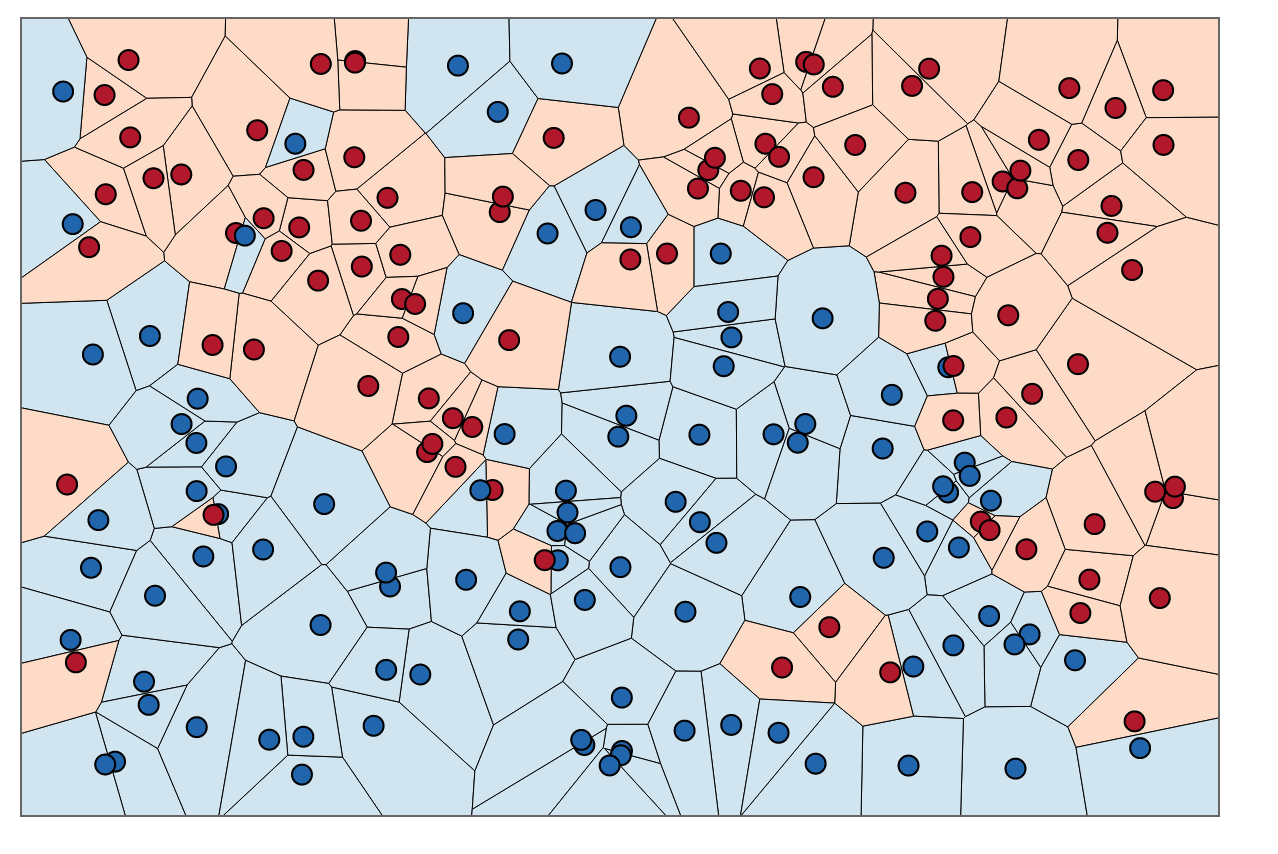

Remarquez qu'**il n'y a pas de points rouges dans les r√©gions bleues** et vice versa. Cela nous indique qu'**il y a une erreur d'entra√Ænement de 0**.

Notez que les **limites de d√©cision** ne sont g√©n√©ralement trac√©es qu'**entre diff√©rentes cat√©gories** (jetez toutes les limites bleu-bleu-rouge-rouge), de sorte que votre limite de d√©cision pourrait ressembler davantage √† ceci

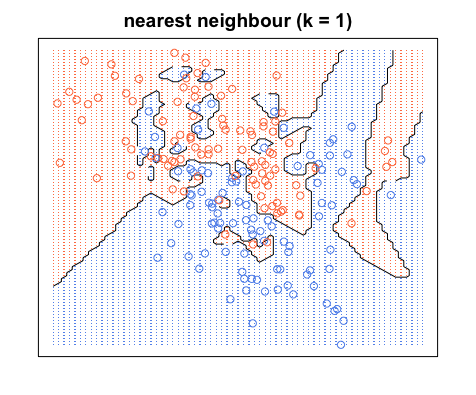

Encore une fois, **tous les points bleus sont dans les limites bleues** et **tous les points rouges sont dans les limites rouges** ; nous avons toujours une **test error** $= 0$. Par contre, si on augmente $K$ √† $K=20$, on a le sch√©ma ci-dessous. Notez qu'il y a des **points rouges dans les zones bleues** et des **points bleus dans les zones rouges**. Voici √† quoi ressemble une **training error non nulle**.

Lorsque **K = 20**, nous **colorons les r√©gions autour d'un point en fonction de la cat√©gorie de ce point** (couleur dans ce cas) et de **la cat√©gorie de 19 de ses voisins les plus proches**. Si la plupart des voisins sont bleus, mais que le point d'origine est rouge, le point d'origine est consid√©r√© comme une valeur aberrante et la r√©gion qui l'entoure est color√©e en bleu. C'est pourquoi vous pouvez avoir autant de points de donn√©es rouges dans une zone bleue et vice versa.

**reponse**:
    
Le mod√®le KNN avec K = 1 correspondrait exactement √† l'ensemble d'apprentissage et l'erreur d'apprentissage serait donc nulle. Cela signifie que l'erreur de test doit √™tre de 36 % pour que la moyenne des erreurs soit de 18 %. Comme la s√©lection du mod√®le est bas√©e sur les performances sur l'ensemble de test, nous choisirons la r√©gression logistique pour classer les nouvelles observations.

### Exercice 9

Ce probl√®me a √† voir avec les `odds`. 

(a) En moyenne, quelle fraction de personnes ayant une `odds` de 0,37 de faire d√©faut sur leur paiement par carte de cr√©dit sera en fait d√©faillante ?

**reponse**:
    
$$\mbox{Odds} = \frac {P(X)}{1 - P(X)}$$

$$\frac {P(X)}{1 - P(X)} = 0.37$$

$$\frac {1 - P(X)}{P(X)} = \frac{1}{0.37}$$

$$\frac {1}{P(X)} - \frac {P(X)}{P(X)} = \frac{1}{0.37}$$

$$\frac {1}{P(X)} - 1 = \frac{1}{0.37}$$

$$\frac {1}{P(X)} = \frac{1}{0.37} + 1$$

$$\frac {1}{P(X)} = \frac{1}{0.37} + \frac{0.37}{0.37}$$

$$\frac {1}{P(X)} = \frac{1 + 0.37}{0.37}$$

$$\frac {1}{P(X)} = \frac{1.37}{0.37}$$

$$P(X) = \frac{0.37}{1.37}$$

$$P(X) = 0.27$$

27% des personnes ayant une odds de 0.37 seront en default

(b) Supposons qu'un individu ait 16 % de chances de ne pas payer avec sa carte de cr√©dit. Quelles sont les `odds` qu'elle fasse d√©faut ?

**reponse**:
    
$$\mbox{Odds} = \frac {P(X)}{1 - P(X)}$$

avec $P(X) = 0.16$ alors:

$$\mbox{Odds} = \frac {0.16}{1 - 0.16} = 0.19$$

### Exercice 10

In [8]:
# 4.29 : Naive Bayes

Au sein de la classe $k$, les $p$ pr√©dicteurs sont **ind√©pendants** : pour $k = 1,...,K$ :

$$f_k(x) = f_{k1}(x_1) \space \mbox{x} \space f_{k2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{kp}(x_p)$$

In [10]:
# 4.30 : posterior probability

$$P(Y = k \space | \space X = x) = \frac{\pi_k \space \mbox{x} \space f_{k1}(x_1) \space \mbox{x} \space f_{k2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{kp}(x_p)}{\sum_{l = 1}^{K}\pi_l \space \mbox{x} \space f_{l1}(x_1) \space \mbox{x} \space f_{l2}(x_2) \space \mbox{x} \space ...  \mbox{x} \space f_{lp}(x_p)}$$

In [2]:
# 4.31

$$4.31$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right )$$

In [3]:
# 4.32

$$4.32$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \mbox{log} \left ( \frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k \mbox{exp}(-\frac{1}{2}(x - \mu_k)^T Œ£^{-1} (x - \mu_k))}{\pi_K \mbox{exp}(-\frac{1}{2}(x - \mu_K)^T Œ£^{-1} (x - \mu_K))}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(x - \mu_k)^T Œ£^{-1}(x - \mu_k) + \frac{1}{2}(x - \mu_K)^T Œ£^{-1}(x - \mu_K)$$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(\mu_k + \mu_K)^T Œ£^{-1}(\mu_k - \mu_K) + x^T Œ£^{-1}(\mu_k - \mu_K)$$

$$ = a_k + \sum_{j=1}^{p}b_{kj}x_j$$

$$ \mbox{avec} \space \space a_k = \mbox{log} \left ( \frac{\pi_k}{\pi_K}\right ) - \frac{1}{2}(\mu_k + \mu_K)^T Œ£^{-1}(\mu_k - \mu_K)$$

$$ \mbox{et avec} \space \space b_{kj} = j_{th} \space \space \mbox{composante de}\space \space Œ£^{-1}(\mu_k - \mu_K)$$

In [4]:
# 4.33 (QDA)


$$\mbox{QDA}$$


$$4.33$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = a_k + \sum_{j=1}^{p}b_{kj}x_j + \sum_{j=1}^{p} \sum_{l=1}^{p}c_{kjl}x_j x_l$$

In [5]:
# 4.34

$$4.34$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \mbox{log} \left ( \frac{\pi_k f_k(x)}{\pi_K f_K(x)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k \prod_{j=1}^{p} f_{kj}(x_j)}{\pi_K \prod_{j=1}^{p} f_{Kj}(x_j)}\right ) $$

$$ = \mbox{log} \left ( \frac{\pi_k}{\pi_K} \right ) + \sum_{j=1}^{p} \mbox{log}  \left (\frac{f_{kj}(x_j)}{f_{Kj}(x_j)} \right )$$

$$ = a_k + \sum_{j=1}^{p}g_{kj}(x_j)$$

$$ \mbox{avec} \space \space a_k =\mbox{log} \left ( \frac{\pi_k}{\pi_K} \right )$$

$$ \mbox{et avec} \space \space g_{kj}(x_j) = \mbox{log}  \left (\frac{f_{kj}(x_j)}{f_{Kj}(x_j)} \right )$$




In [6]:
# 4.35 Mulinomial Logistic Regression

$$ \mbox{Multinomial Logistic Regression}$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = \beta_{k0} + \sum_{j=1}^{p}\beta_{kj}x_j$$

L'√©quation 4.32 a d√©riv√© une expression pour $\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right )$  dans le cadre o√π $p > 1$, de sorte que la moyenne de la classe $k$, $\mu_k$, est un vecteur de dimension $p$, et la covariance partag√©e $Œ£$ est une matrice `p √ó p`. Cependant, dans le cadre avec $p = 1$, (4.32) prend une forme plus simple, puisque les moyennes $\mu_1$,..., $\mu_K$ et la variance $\sigma^2$ sont des scalaires. Dans ce cadre plus simple, r√©p√©tez le calcul de (4.32) et fournissez des expressions pour $a_k$ et $b_{kj}$ en termes de $\pi_k$, $\pi_K$, $\mu_k$, $\mu_K$ et $\sigma^2$.

### Exercice 11

√âlaborez les formes d√©taill√©es de $a_k$, $b_{kj}$ et $b_{kjl}$ dans (4.33). Votre r√©ponse devrait impliquer $\pi_k$, $\pi_K$, $\mu_k$, $\mu_K$, $Œ£_k$ et $Œ£_K$.

$$4.33$$

$$\mbox{log} \left ( \frac{P(Y = k \space | \space X = x)} {P(Y = K \space | \space X = x)}\right ) = a_k + \sum_{j=1}^{p}b_{kj}x_j + \sum_{j=1}^{p} \sum_{l=1}^{p}c_{kjl}x_j x_l$$

### Exercice 12

Supposons que vous souhaitiez classer une observation $X ‚àà R$ en `pommes` et `oranges`. Vous ajustez un mod√®le de **r√©gression logistique** et trouvez que:

$$Pr(\hat Y = \mbox{orange} \space | \space X = x) = \frac{\mbox{exp}(\hat \beta_0 + \hat \beta_1x)}{ 1 + \mbox{exp}(\hat \beta_0 + \hat \beta_1x)}$$

Votre ami adapte un mod√®le de **r√©gression logistique** aux m√™mes donn√©es en utilisant la formulation **Softmax**:

$$ \mbox{Softmax} : \delta(x)_i = \frac {\mbox{exp}(x_i)}{\sum_{j=1}^{N}\mbox{exp}(x_j)}$$

$$P(Y = k \space | \space X = x)  = \frac{\mbox{exp}(\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp}x_p)}{\sum_{l=1}^{K}\mbox{exp}(\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp}x_p)}$$

et trouve que:

$$Pr(\hat Y = \mbox{orange} \space | \space X = x) = \frac{\mbox{exp}(\hat \alpha_{orange0} + \hat \alpha_{orange1}x)}{ \mbox{exp}(\hat \alpha_{orange0} + \hat \alpha_{orange1}x) + \mbox{exp}(\hat \alpha_{pomme0} + \hat \alpha_{pomme1}x)}$$



**odds** est la probabilit√© de succ√®s/probabilit√© d'√©chec : $ \mbox{odds}= \frac{\mbox{P(succ√®s)}}{\mbox{P(echec)}}$

**log(odds)** est le logarithme de la probabilit√© de succ√®s / probabilit√© d'echec : $\mbox{log(odds)} = \mbox{log}\left (\frac{\mbox{P(succ√®s)}}{\mbox{P(echec)}}\right ) = \mbox{log}\left (\frac{\mbox{P(succ√®s)}}{\mbox{1 - P(succes)}}\right )$

$$\mbox{log}_{odds}(A) = \mbox{log} \left ( \frac{\mbox{P(A)}}{\mbox{1 - P(A)}} \right )$$

$$e^{log_{odds}} = \mbox{odds ratio}$$

(a) Quelle est **log(odds)** de `orange` par rapport √† `pomme` dans votre mod√®le ?

**reponse**:
    
$$p = \frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}$$

$$1 - p = 1 - \frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}} = \frac{1}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}$$

### $$\frac {p}{1 -p} = \frac{\frac{e^{\hat \beta_0 + \hat \beta_1 x}}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}}{\frac{1}{1 + e^{\hat \beta_0 + \hat \beta_1 x}}} = e^{\hat \beta_0 + \hat \beta_1 x}$$

$$ \mbox{log} \left( \frac {p}{1 -p} \right ) = \hat \beta_0 + \hat \beta_1 x$$

(b) Quelle est **log(odds)** de `orange` par rapport √† `pomme` dans le mod√®le de votre ami ?

**reponse**:
    
### $$p = \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

### $$1 - p = 1 -  \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}} = \frac{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

### $$\frac {p}{1 - p} = \frac{\frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}} {\frac{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x} + e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}} = \frac{e^{\hat \beta_{orange0} + \hat \beta_{orange1} x}}{e^{\hat \beta_{pomme0} + \hat \beta_{pomme1} x}}$$

$$ \mbox{log} \left( \frac {p}{1 -p} \right ) = \hat \beta_{orange0} + \hat \beta_{orange1} x - (\hat \beta_{pomme0} + \hat \beta_{pomme1} x) = \hat \beta_{orange0} + \hat \beta_{orange1} x - \hat \beta_{pomme0} - \hat \beta_{pomme1} x$$

(c) Supposons que dans votre mod√®le, $\hat \beta_0 = 2$ et $\hat \beta_1 = ‚àí1$. Quelles sont les estimations de coefficient dans le mod√®le de votre ami ? Soyez aussi sp√©cifique que possible

(d) Supposons maintenant que vous et votre ami ajustiez les deux m√™mes mod√®les sur un ensemble de donn√©es diff√©rent. Votre ami obtient les estimations de coefficient :</br>

$\hat \alpha_{orange0} = 1.2$</br>
$\hat \alpha_{orange1} = ‚àí2$</br>
$\hat \alpha_{pomme0} = 3$</br>
$\hat \alpha_{pomme1} = 0.6$

Quelles sont les estimations de coefficient dans votre mod√®le ? 

(e) Enfin, supposons que vous appliquiez les deux mod√®les de (d) √† un ensemble de donn√©es avec 2 000 observations de test. Dans quelle fraction de temps pensez-vous que les √©tiquettes de classe pr√©dites de votre mod√®le concordent avec celles du mod√®le de votre ami ? Expliquez votre r√©ponse

### Exercice 13

Il convient de r√©pondre √† cette question √† l'aide de l'ensemble de donn√©es hebdomadaire, qui fait partie du package `ISLR2`. Ces donn√©es sont de nature similaire aux donn√©es Smarket du laboratoire de ce chapitre, sauf qu'elles contiennent 1 089 d√©clarations hebdomadaires pendant 21 ans, du d√©but de 1990 √† la fin de 2010.

(a) Produire des r√©sum√©s num√©riques et graphiques des donn√©es hebdomadaires. Est-ce qu'il semble y avoir des mod√®les?

In [4]:
weekly = pd.read_csv('weekly.csv')
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [5]:
weekly.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

il y a de **fortes correlations** entre `Year`/`Volume`</br>
les plus **fortes correlations** pour `Today` sont avec `Lag1` et `Lag3`

In [6]:
today = weekly['Today']
today_perc = (today + 100) / 100
print(min(today), max(today))
print(min(today_perc), max(today))

-18.195 12.026
0.81805 12.026


Text(0, 0.5, "Values's variations  of today's percentage")

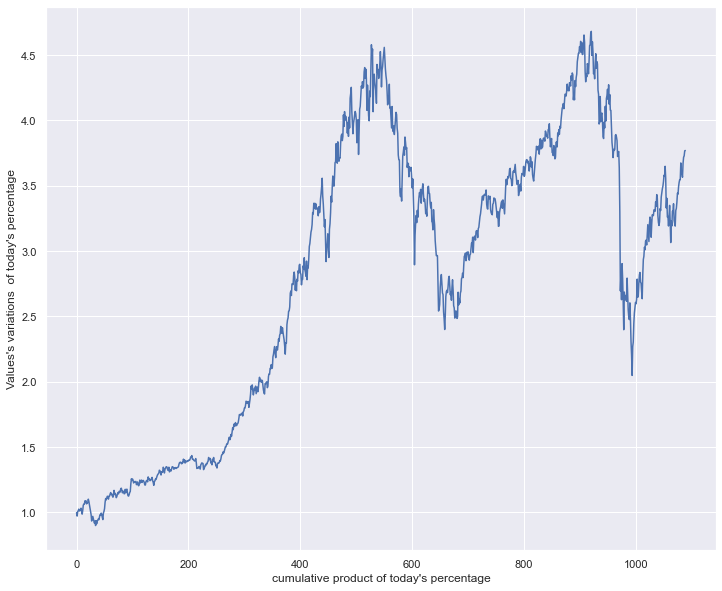

In [7]:
today_perc.cumprod().plot()
plt.xlabel("cumulative product of today's percentage")
plt.ylabel("Values's variations  of today's percentage")

Text(0, 0.5, 'Volume')

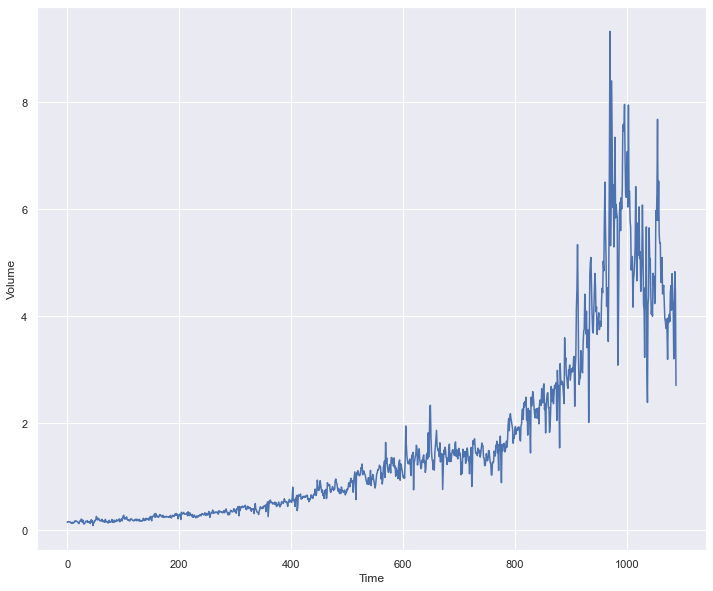

In [8]:
weekly['Volume'].plot()
plt.xlabel("Time")
plt.ylabel("Volume")

<AxesSubplot:xlabel='Direction', ylabel='Lag3'>

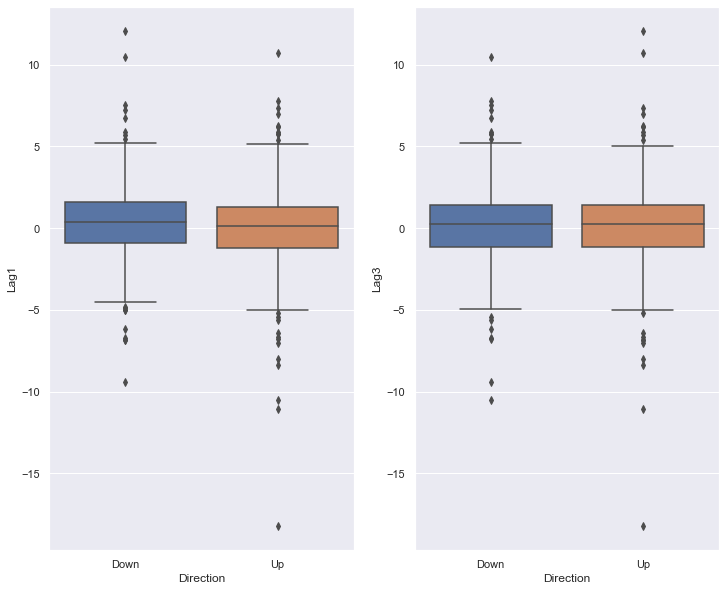

In [32]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(x='Direction', y='Lag1', data=weekly, ax = ax[0])
sns.boxplot(x='Direction', y='Lag3', data=weekly, ax = ax[1])

In [9]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

(b) Utilisez l'ensemble de donn√©es complet pour effectuer une r√©gression logistique avec la direction comme r√©ponse et les cinq variables de d√©calage plus le volume comme pr√©dicteurs. Utilisez la fonction de r√©sum√© pour imprimer les r√©sultats. Certains des pr√©dicteurs semblent-ils statistiquement significatifs ? Si oui, lesquels?


In [10]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                0.006580
Time:                        08:04:00   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

`Lag2` est statistiquement significatif donc on peut rejeter l'hypoth√®se nulle que $\hat \beta_{Lag2} = 0$

In [11]:
results = smf.logit('Direction ~ Lag2', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.684306
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                0.003866
Time:                        08:04:04   Log-Likelihood:                -745.21
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                   0.01617
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2147      0.061      3.507      0.000       0.095       0.335
Lag2           0.0628      0.026      2.382      0.017       0.011       0.114
==============================================================================
"""

(c) Calculez la matrice de confusion et la fraction globale des pr√©dictions correctes. Expliquez ce que la matrice de confusion vous dit sur les types d'erreurs commises par la r√©gression logistique.

In [17]:
min(results.predict(weekly)), max(results.predict(weekly))

(0.2833828122587036, 0.7250898070644308)

In [24]:
preds = np.where(results.predict(weekly) > 0.5, 1, 0)
cm = confusion_matrix(weekly['Direction'], preds)
cm

array([[ 33, 451],
       [ 26, 579]], dtype=int64)

<AxesSubplot:>

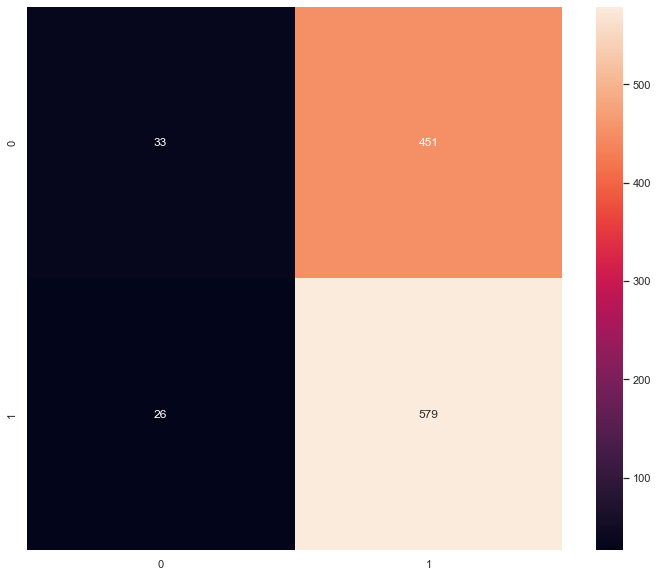

In [27]:
sns.heatmap(cm, annot=True, fmt="d")

In [49]:
total = 33 + 451 + 26 + 579
accuracy = (33 + 579) / total
down_true = (451 + 33)
down_pred = (33)
up_true = (26 + 579)
up_pred = 579
print(f'les predictions sont correctes a {round(accuracy*100, 2)}%')
print(f'les predictions "Direction == Down" sont correctes a {round((down_pred / down_true)*100, 2)}%')
print(f'les predictions "Direction == Up" sont correctes a {round((up_pred / up_true)*100, 2)}%')
print(f'total de "Direction == Up" : {round((up_true / total)*100, 2)}%')
print(f'difference entre accuracy du model et total de "Direction == Up" : {round((accuracy - (up_true / total))*100, 2)}%')

les predictions sont correctes a 56.2%
les predictions "Direction == Down" sont correctes a 6.82%
les predictions "Direction == Up" sont correctes a 95.7%
total de "Direction == Up" : 55.56%
difference entre accuracy du model et total de "Direction == Up" : 0.64%


56,2 % des predictions sont correctes, mais ce n'est que l√©g√®rement sup√©rieur au total de 55,6 % de 'Direction == Up'.

(d) Ajustez maintenant le mod√®le de r√©gression logistique en utilisant une p√©riode de donn√©es d'entra√Ænement de 1990 √† 2008, avec Lag2 comme seul pr√©dicteur. Calculez la matrice de confusion et la fraction globale des pr√©dictions correctes pour les donn√©es retenues (c'est-√†-dire les donn√©es de 2009 et 2010).

In [92]:
year_bool = weekly['Year'] < 2009
weekly['ones'] = 1
X_train = weekly[year_bool][['ones', 'Lag2']].values
X_test = weekly[~year_bool][['ones', 'Lag2']].values
y_train = weekly[year_bool]['Direction'].values
y_test = weekly[~year_bool]['Direction'].values

In [95]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
                      penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                      verbose=0, warm_start=False)
lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [97]:
cm = confusion_matrix(y_test, lr.predict(X_test))
cm

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

<AxesSubplot:>

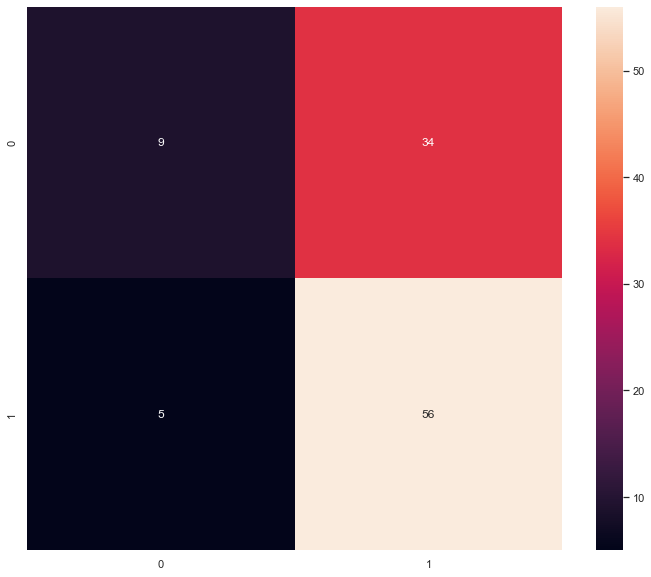

In [98]:
sns.heatmap(cm, annot=True, fmt="d")

In [99]:
total = 9 + 34 + 5 + 56
accuracy = (9 + 56) / total
down_true = (9 + 34)
down_pred = (9)
up_true = (5 + 56)
up_pred = 56
print(f'les predictions sont correctes a {round(accuracy*100, 2)}%')
print(f'les predictions "Direction == Down" sont correctes a {round((down_pred / down_true)*100, 2)}%')
print(f'les predictions "Direction == Up" sont correctes a {round((up_pred / up_true)*100, 2)}%')
print(f'total de "Direction == Up" : {round((up_true / total)*100, 2)}%')
print(f'difference entre accuracy du model et total de "Direction == Up" : {round((accuracy - (up_true / total))*100, 2)}%')

les predictions sont correctes a 62.5%
les predictions "Direction == Down" sont correctes a 20.93%
les predictions "Direction == Up" sont correctes a 91.8%
total de "Direction == Up" : 58.65%
difference entre accuracy du model et total de "Direction == Up" : 3.85%


(e) R√©p√©tez (d) en utilisant **LDA**.

In [100]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]], dtype=int64)

Meme resultats pour **Linear Discriminant Analysis** que **Logistic Regression**

(f) R√©p√©tez (d) en utilisant **QDA**.

In [195]:
qda = QuadraticDiscriminantAnalysis(reg_param=0.001) # si reg_param = 0 : on obtient une 'Error : Division by zero'(power, log)
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

C:\Users\david\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


array([[ 0, 43],
       [ 0, 61]], dtype=int64)

In [196]:
qda.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(g) R√©p√©tez (d) en utilisant **KNN** avec $K = 1$.

In [112]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[22, 21],
       [31, 30]], dtype=int64)

(h) R√©p√©tez (d) en utilisant **Naive Bayes**.

In [128]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(abs(X_train), y_train)
confusion_matrix(y_test, clf.predict(abs(X_test)))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

Naive Bayes Multinomial ne fonctionne pas avec des valeurs negatives

In [149]:
bool_date = weekly['Year'] < 2009
log2_train = weekly[bool_date]['Lag2'].values.reshape((len(X_train), 1))
log2_test = weekly[~bool_date]['Lag2'].values.reshape((len(X_test), 1))

In [173]:
len(log2_test_scale), len(log2_train_scale)

(104, 985)

In [180]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(log2_train, y_train)
log2_train_scale, log2_test_scale = scaler.transform(log2_train), scaler.transform(log2_test);

In [187]:
ones_train = np.ones(len(X_train)).reshape(len(X_train), 1)
ones_test = np.ones(len(X_test)).reshape(len(X_test), 1)

X_train_scale = np.column_stack((ones_train, log2_train_scale))
X_test_scale = np.column_stack((ones_test, log2_test_scale))

In [189]:
clf.fit(X_train_scale, y_train)
confusion_matrix(y_test, clf.predict(X_test_scale))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

In [191]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_scale, y_train)
confusion_matrix(y_test, clf.predict(X_test_scale))

array([[ 0, 43],
       [ 0, 61]], dtype=int64)

(i) Laquelle de ces m√©thodes semble fournir les meilleurs r√©sultats sur ces donn√©es ?

**Logistic Regression** et **Linear Discriminant Analysis** ont les meilleurs score (accuracy)

(j) Exp√©rimentez avec diff√©rentes combinaisons de pr√©dicteurs, y compris les transformations et interactions possibles, pour chacune des m√©thodes. Indiquez les variables, la m√©thode et la matrice de confusion associ√©e qui semblent fournir les meilleurs r√©sultats sur les donn√©es retenues. Notez que vous devez √©galement exp√©rimenter avec des valeurs pour K dans le classificateur KNN

In [192]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[20, 23],
       [20, 41]], dtype=int64)

In [197]:
results = smf.logit('Direction ~ np.power(Lag5, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686956
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               8.318e-06
Time:                        10:27:08   Log-Likelihood:                -748.09
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.9112
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2256      0.065      3.475      0.001       0.098       0.353
np.power(Lag5, 2)    -0.0004      0.004     -0.112      0.911      -0.008       0.007
=====================================================================================
"""

In [198]:
results = smf.logit('Direction ~ np.power(Volume, 2)', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686884
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               0.0001136
Time:                        10:27:45   Log-Likelihood:                -748.02
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.6801
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.2359      0.068      3.448      0.001       0.102       0.370
np.power(Volume, 2)    -0.0024      0.006     -0.413      0.680      -0.014       0.009
=======================================================================================
"""

In [199]:
results = smf.logit('Direction ~ Volume * Lag3', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.686505
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:               0.0006650
Time:                        10:28:06   Log-Likelihood:                -747.60
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.8025
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2631      0.084      3.134      0.002       0.099       0.428
Volume         -0.0235      0.036     -0.649      0.516      -0.095       0.048
Lag3           -0.0188      0.039     -0.482      0.630      -0.095       0.058
Volume:Lag3    -0.0007      0.011     -0.067      0.946      -0.022       0.020
===============================================================================
"""

### Exercice 14

Dans ce probl√®me, vous allez d√©velopper un mod√®le pour pr√©dire si une voiture donn√©e obtient une consommation d'essence √©lev√©e ou faible en fonction du dataset `Auto`.

(a) Cr√©ez une variable binaire, `mpg01`, qui contient un **1** si `mpg` contient une **valeur sup√©rieure √† sa m√©diane**, et un **0** si `mpg` contient une **valeur inf√©rieure √† sa m√©diane**. Vous pouvez calculer la m√©diane √† l'aide de la fonction `median()`. Notez que vous pouvez trouver utile d'utiliser la fonction `data.frame()` pour cr√©er un ensemble de donn√©es unique contenant √† la fois `mpg01` et les `autres variables Auto`.


In [200]:
auto = pd.read_csv('auto.csv')

In [214]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
mpg01             int64
dtype: object

In [213]:
auto['mpg01'] = np.array(np.where(auto['mpg'] > auto['mpg'].median(), 1, 0), dtype='int64')

(b) Explorer graphiquement les donn√©es afin d'√©tudier l'association entre `mpg01` et les `autres caract√©ristiques`. Laquelle des autres fonctionnalit√©s semble la plus susceptible d'√™tre utile pour pr√©dire `mpg01` ? Les **scatterplots** et les **boxplots** peuvent √™tre des outils utiles pour r√©pondre √† cette question. D√©crivez vos d√©couvertes.

In [202]:
auto.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   
mpg01         0.836939  -0.759194     -0.753477   -0.667053 -0.757757   

              acceleration      year    origin     mpg01  
mpg               0.423329  0.580541  0.565209  0.836939  
cylinders        -0.504683 -0.345647 -0.568932 -0.759194  
displacement     -0.543800 -0.369855 -0.614535 -0.753477  
horsepower       -0.689196 -0.416361 -0.455171 -0.667053  
weight           -0.416839 -0.309120 -0.585005 -0.757757  
acceleration      1.000000  0.290316  0.212746  0.346822  
year              0.290316  1.000000  0.181528  0.429904  
origin            0.212746  0.181528  1.000000  0.513698  
mpg01             0.346822  0.429904  0.513698  1.000000

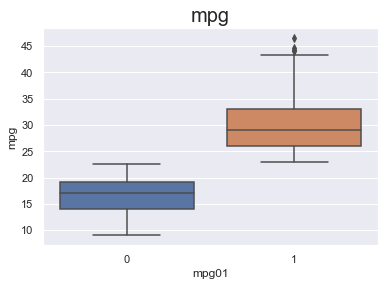

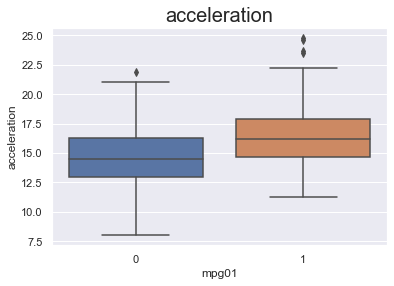

In [247]:
for col in auto.select_dtypes('float'):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=auto['mpg01'], y =auto[col])
    plt.title(f'{col}', fontsize=20)

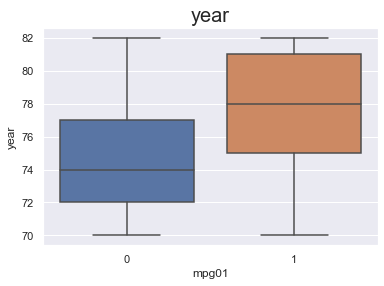

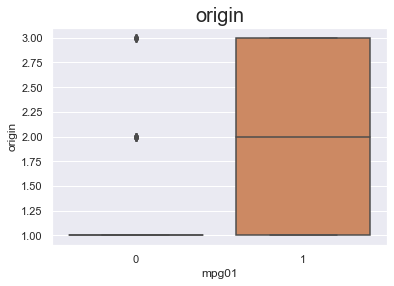

<Figure size 432x288 with 0 Axes>

In [246]:
for col in auto.select_dtypes('int64'):
    plt.figure(figsize=(6,4))
    if col == 'mpg01':
        break
    sns.boxplot(x=auto['mpg01'], y =auto[col])
    plt.title(f'{col}', fontsize=20)

<Figure size 864x720 with 0 Axes>

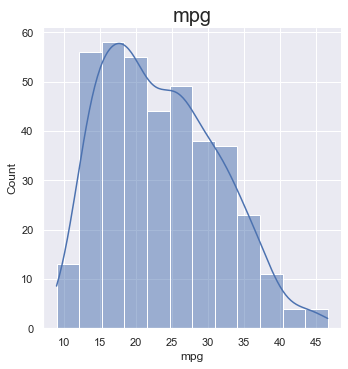

<Figure size 864x720 with 0 Axes>

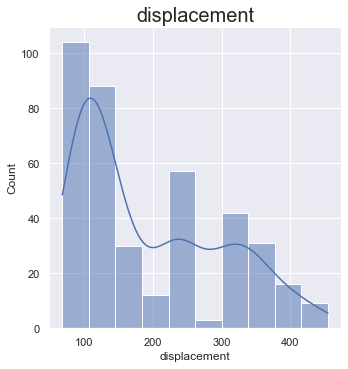

<Figure size 864x720 with 0 Axes>

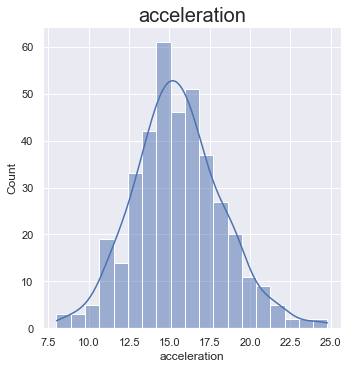

In [248]:
for col in auto.select_dtypes('float'):
    plt.figure()
    sns.displot(auto[col], kde=True)
    plt.title(f'{col}', fontsize=20)

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

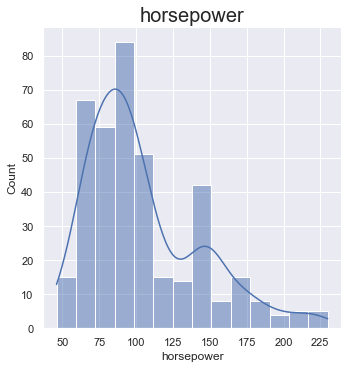

<Figure size 864x720 with 0 Axes>

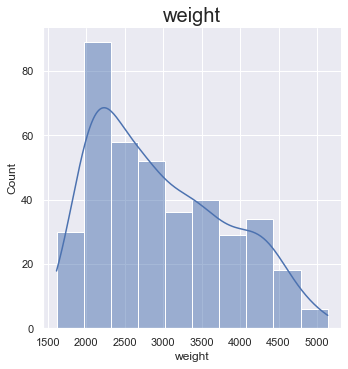

<Figure size 864x720 with 0 Axes>

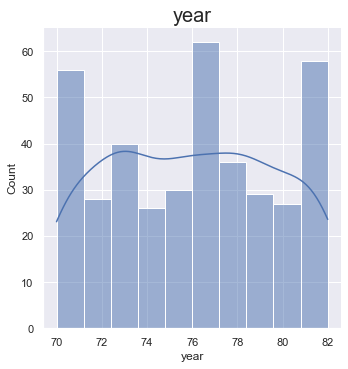

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

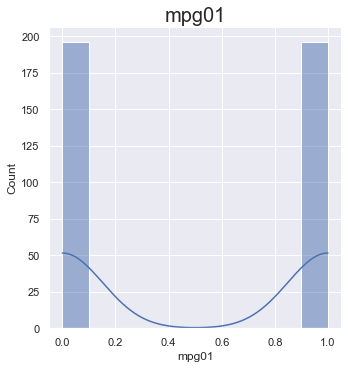

In [249]:
for col in auto.select_dtypes('int64'):
    plt.figure()
    sns.displot(auto[col], kde=True)
    plt.title(f'{col}', fontsize=20)

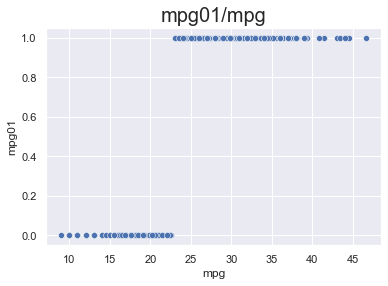

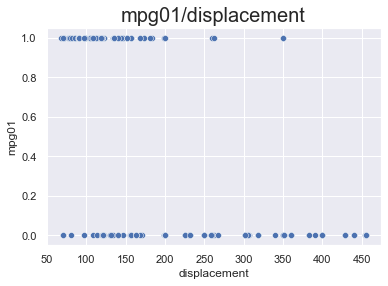

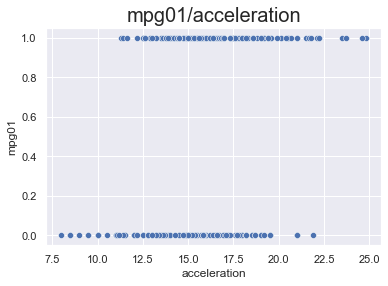

In [254]:
for col in auto.select_dtypes('float'):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=auto[col], y =auto['mpg01'])
    plt.title(f'mpg01/{col}', fontsize=20)

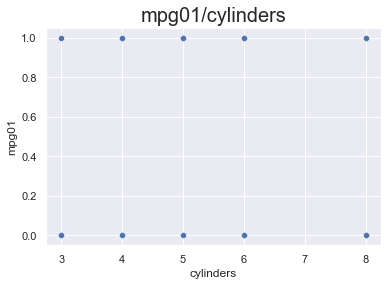

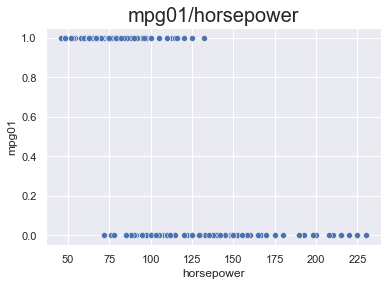

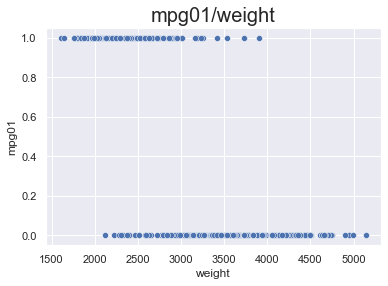

In [251]:
for col in auto.select_dtypes('int64'):
    if col == 'mpg01':
        break
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=auto[col], y =auto['mpg01'])
    plt.title(f'mpg01/{col}', fontsize=20)

(c) Divisez les donn√©es en un ensemble d'apprentissage et un ensemble de test.

In [256]:
from sklearn.model_selection import train_test_split

In [262]:
X = auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [259]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

In [268]:
scale = MinMaxScaler()
scale.fit(X_train, y_train)
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [269]:
lr = LogisticRegression(max_iter=100)
lr.fit(X_train_scale, y_train)
accuracy_score(y_test, lr.predict(X_test_scale))

0.9873417721518988

(d) Effectuez **LDA** sur les donn√©es d'apprentissage afin de pr√©dire `mpg01` en utilisant les variables qui semblaient les plus associ√©es √† `mpg01` en (b). Quelle est l'erreur de test du mod√®le obtenu ?

In [281]:
X = auto[['cylinders', 'displacement']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [282]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9240506329113924

In [271]:
# cylinders / displacement / weight / horsepower / origin / year (par ordre decroissant)

In [283]:
X = auto[['cylinders', 'origin']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9493670886075949

In [284]:
X = auto[['cylinders', 'weight']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9493670886075949

In [285]:
X = auto[['cylinders', 'origin', 'year', 'acceleration']].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9081632653061225

In [294]:
# .difference(['name']) : supprime la colonne 'name' de auto.columns
# https://datascience.stackexchange.com/questions/46434/dataframe-columns-difference-use
auto.columns[1:-1].difference(['name'])

Index(['acceleration', 'cylinders', 'displacement', 'horsepower', 'origin',
       'weight', 'year'],
      dtype='object')

In [295]:
X = auto[auto.columns[1:-1].difference(['name'])].values
y = auto['mpg01'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9489795918367347

(e) Effectuez **QDA** sur les donn√©es de formation afin de pr√©dire `mpg01` en utilisant les variables qui semblaient les plus associ√©es √† `mpg01` en (b). Quelle est l'erreur de test du mod√®le obtenu ?

In [296]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9489795918367347

(f) Effectuez une **r√©gression logistique** sur les donn√©es d'apprentissage afin de pr√©dire `mpg01` en utilisant les variables qui semblaient les plus associ√©es √† `mpg01` en (b). Quelle est l'erreur de test du mod√®le obtenu ?


In [297]:
# C=.01 : regularization 
lr = LogisticRegression(C=.01)
lr.fit(X_train, y_train)
accuracy_score(y_test, lr.predict(X_test))

0.9897959183673469

(g) Effectuez un **NaiveBayes** sur les donn√©es d'apprentissage afin de pr√©dire `mpg01` en utilisant les variables qui semblaient les plus associ√©es √† `mpg01` en (b). Quelle est l'erreur de test du mod√®le obtenu ?

In [307]:
nb = GaussianNB()
nb.fit(X_train, y_train)
accuracy_score(y_test, nb.predict(X_test))

0.9285714285714286

(h) Effectuez **KNN** sur les donn√©es d'apprentissage, avec plusieurs valeurs de **K**, afin de pr√©dire `mpg01`. Utilisez uniquement les variables qui semblaient les plus associ√©es √† `mpg01` en (b). Quelles erreurs de test obtenez-vous ? Quelle valeur de $K$ semble √™tre la plus performante sur cet ensemble de donn√©es ?

In [300]:
s = list()
for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    print('With K={} accuracy is {:.3f}'.format(k, accuracy))
    s.append((k, accuracy))

In [304]:
s[10:35]

[(11, 0.9081632653061225),
 (12, 0.9081632653061225),
 (13, 0.9081632653061225),
 (14, 0.9081632653061225),
 (15, 0.8979591836734694),
 (16, 0.8979591836734694),
 (17, 0.8877551020408163),
 (18, 0.9183673469387755),
 (19, 0.9183673469387755),
 (20, 0.9183673469387755),
 (21, 0.9081632653061225),
 (22, 0.9081632653061225),
 (23, 0.9081632653061225),
 (24, 0.9183673469387755),
 (25, 0.9081632653061225),
 (26, 0.9183673469387755),
 (27, 0.9183673469387755),
 (28, 0.9183673469387755),
 (29, 0.9183673469387755),
 (30, 0.9183673469387755),
 (31, 0.9183673469387755),
 (32, 0.9183673469387755),
 (33, 0.9081632653061225),
 (34, 0.9081632653061225),
 (35, 0.8979591836734694)]

On voit que les meilleurs valeurs pour $k$ sont entre **18 et 32**

### Exercice 15

Ce probl√®me implique l'√©criture de fonctions.

(a) √âcrivez une fonction, `Power()`, qui affiche le r√©sultat de l'√©l√©vation de 2 √† la puissance 3. En d'autres termes, votre fonction doit calculer $2^3$ et imprimer les r√©sultats.

**Indice** : rappelez-vous que $x^a$ √©l√®ve $x$ √† la **puissance a**. Utilisez la fonction `print()` pour afficher le r√©sultat.

In [314]:
power = lambda x: x**3
power(2)

8

(b) Cr√©ez une nouvelle fonction, `Power2()`, qui vous permet de transmettre deux nombres quelconques, $x$ et $a$, et affiche la valeur de $x^a$. Vous pouvez le faire en commen√ßant votre fonction par la ligne

> Puissance2(3, 8)



In [317]:
power2 = lambda x, a: x ** a
print(power2(3, 8))

6561


(c) En utilisant la fonction `Power2()` que vous venez d'√©crire, calculez $10^3$, $8^{17}$ et $131^3$.

In [315]:
print(power2(10,3))
print(power2(8,17))
print(power2(131,3))

1000
2251799813685248
2248091


(d) Cr√©ez maintenant une nouvelle fonction, `Power3()`, qui renvoie en fait le r√©sultat $x^a$ sous la forme d'un **objet R**, plut√¥t que de simplement l'afficher √† l'√©cran. C'est-√†-dire que si vous stockez la valeur $x^a$ dans un objet appel√© `result` au sein de votre fonction, alors vous pouvez simplement `return()` qui retourne ce resultat, en utilisant la ligne suivante : `return (result)`</br>


In [316]:
def power3(x, a):
    result = x ** a
    return result

power3(2,2)

4

(e) Maintenant, en utilisant la fonction `Power3()`, cr√©ez un trac√© de $f(x) = x^2$. L'**axe des** $x$ doit afficher une plage d'entiers de **1 √† 10** et l'**axe des y** doit afficher $x^2$. √âtiquetez les axes de mani√®re appropri√©e et utilisez un titre appropri√© pour la figure. Envisagez d'afficher l'axe des x, l'axe des y ou les deux sur l'√©chelle logarithmique. Vous pouvez le faire en utilisant **`log = "x"`**, **`log = "y"`** ou **`log = "xy"`** comme arguments de la fonction `plot()`.

In [321]:
n = 11
plt.plot(range(1,n), [power2(x, 2) for x in range(1,n)]);

(f) Cr√©ez une fonction, `PlotPower()`, qui vous permet de cr√©er un graphique de $x$ par rapport √† $x^a$ pour un $a$ fixe et pour une plage de valeurs de $x$. Par exemple, si vous appelez `PlotPower(1:10, 3)` alors un trac√© doit √™tre cr√©√© avec un axe des $x$ prenant les valeurs $1, 2,..., 10$, et un axe des $y$ prenant les valeurs $1^3, 2^3,..., 10^3$

In [326]:
def plot_power(rng, p):
    plt.plot(rng, [power2(x, p) for x in rng])
    
plot_power(range(3,14), 3)

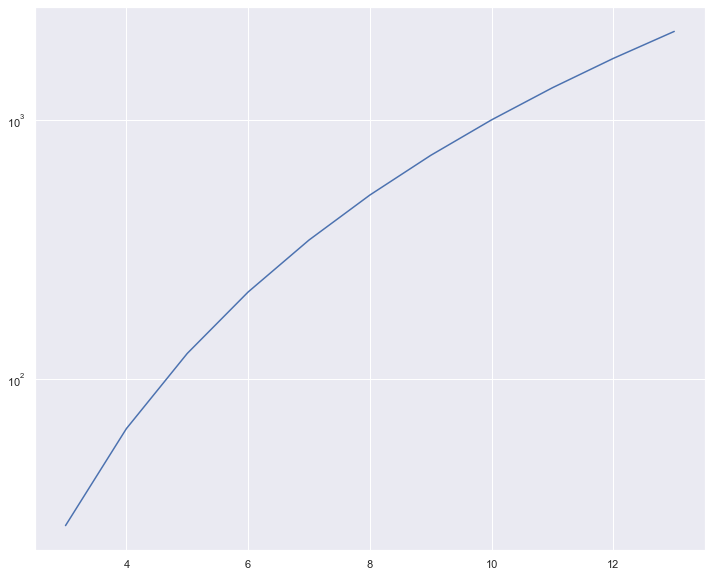

In [331]:
plot_power(range(3,14), 3)
plt.yscale('log')
# plt.gca().invert_yaxis()

### Exercice 16

√Ä l'aide du dataset de `Boston`, ajustez les mod√®les de classification afin de pr√©dire si un secteur de recensement donn√©(`census tract`) a un taux de criminalit√©(`crime rate`) **sup√©rieur** ou **inf√©rieur √† la m√©diane**. Explorez les mod√®les de **r√©gression logistique**, **LDA**, **NaiveBayes** et **KNN** √† l'aide de divers sous-ensembles de pr√©dicteurs. D√©crivez vos d√©couvertes.

Astuce : Vous devrez cr√©er vous-m√™me la variable de r√©ponse, en utilisant les variables contenues dans l'ensemble de donn√©es de `Boston`.

0.45454545454545453